<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/euler-maruyama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: 

Nombre: 

Fecha: 

En su aríticulo de 2002 [1], Elowitz *et al* reportan, quizá por vez primera, mediciones de los niveles de expresión de la proteína verde fluorescente (GFP, por sus siglas en inglés, *Greeen Fluorescent Protein*) de casa una de las céculas bacterianas en un cultivo celular. Estos datos les permiten construir empíricamente las distribuciones poblacionales de los niveles de expresión de la GFP. Desde entonces, se han acentuado los esfuerzos y aportaciones teóricos dirigidos a entender de *dónde surgen / emergen estas distribuciones poblacionales*. Una de las posibles fuentes de ruido / generador de variabilidad de este tipo de sistemas celulares es el **ruido intrínseco**. Este se debe a que las interacciones bioquímicas que regulan los niveles de expresión genética son procesos estocásticos. A continuación, vamos a simular este proceso estocástico de producción y decaimiento de la GFP. Para ellos, utilizaremos el algoritmo de Euler - Maruyama. 

Cargar librerías

In [1]:
install.packages("deSolve")
install.packages("rootSolve")
install.packages("FME")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘minpack.lm’, ‘minqa’




In [24]:
library(ggplot2)

In [5]:
source("Grind.R")

Loading required package: coda



grind.R was sourced


## Descripción del proceso (en este caso, las reacciones): 
El sistema bioquímico de formación y degradación de la GFP a considerar en está dado por las reacciones representadas por:

$$
\varnothing \xrightarrow[]{k_1} \text{GFP} \xrightarrow[]{k_2}  \varnothing \tag{1}
$$

# 1. Establecer modelo y obtener estado estacionario 

## Red para describir las reacciones en las que participa la GFP

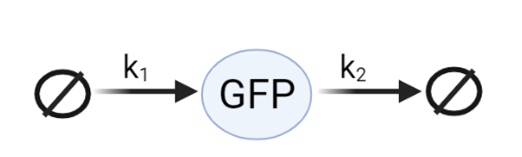

## Modelo matemático 

Realizando el balance de materia para la proteína GFP se tiene

$$
\text{cambio de concentración de la GFP} = \text{entrada de GFP} - \text{degradación de GFP} \tag{2}
$$

$$
\frac{dGFP}{dt} = k_1 s - k_2 GFP \tag{3} 
$$

En (3) se supone que la producción de GFP se realiza a una velocidad constante. Por otro lado, la degradación de la GFP se establece proporcional a su concentración.

Dado que el primer término en (3) es una constante se puede escribir como 

$$
\frac{dGFP}{dt} = p_1 - k_2 GFP \tag{4}
$$

donde $p_1 = k_1 s$

## Análisis de estabilidad 

Igualando (4) a cero y despejando de obtiene el estado estacionario.

$$
\frac{dGFP}{dt} = p_1 - k_2 GFP = 0 \rightarrow GFP_{ss} = \frac{p_1}{k_2}
$$

In [34]:
# calcular estado estacionario 
steady_state <- function(p) {
    with(as.list(p), {
        GFPss <- p1/k2

        return(GFPss)
    })
}

In [35]:
# establecer parámetros 
p <- c(p1 = 1, k2 = 1)

# calcular estado estable
GFPss <- steady_state(p)
print(GFPss)

[1] 1


## Integración numérica 

In [2]:
# modelo 
model <- function(times, parms, state) {
    with(as.list(c(parms, state)),{ 

        dGFP <- p1 - k2*GFP

        return(list(c(dGFP)))
    })
}

In [29]:
# condiciones iniciales 
s <- c(GFP = 0.1)

# tiempo de integración 
times <- seq(0,10,0.1)

In [30]:
# resolver ED
out <- run(timeplot = F,table = T, times = times)

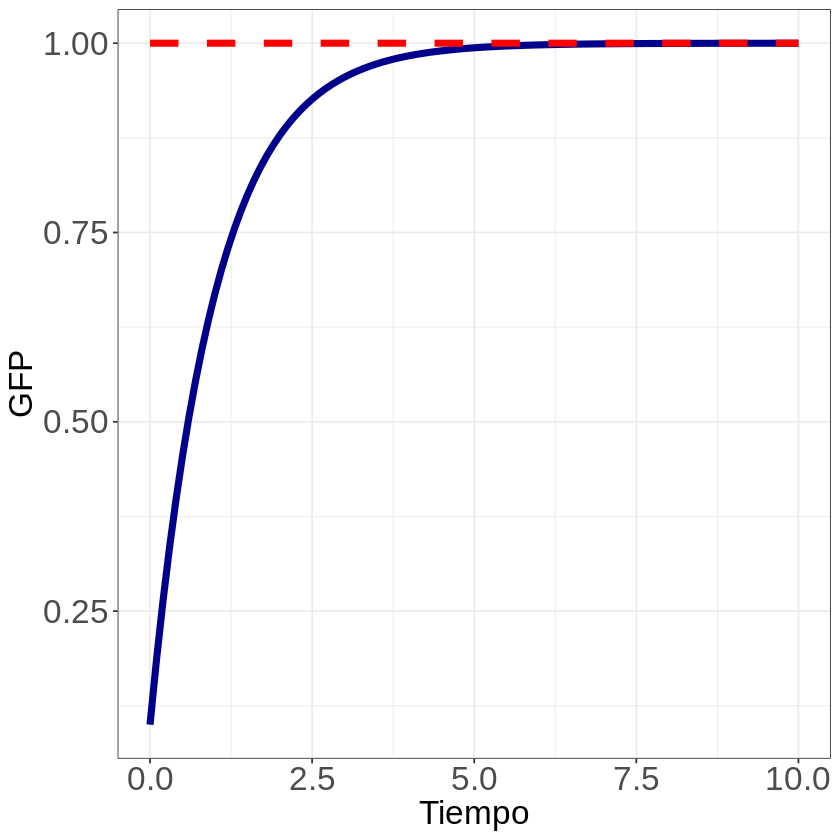

In [39]:
# mostrar fase transitoria 
ggplot(out, aes(x = time, y = GFP)) + 
     geom_line(lwd = 2, col = "darkblue") +
     geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
     col = "red", lty = 2, lwd = 2) +
     xlab("Tiempo") +
     ylab("GFP") + 
     theme_bw() + 
     theme(legend.position = "none",
     plot.title = element_text(size=25,face = "italic"),
     axis.text=element_text(size=20),
     axis.title=element_text(size=20),
     legend.title = element_text(size=20), 
     legend.text = element_text(size=20))


# 2. Seleccionar estado estacionario como condición inicial 

In [40]:
# ahora se utiliza el estado estacionario como la condición inicial 
s <- c(GFP = GFPss)

# resolver ED
out <- run(timeplot = F,table = T, times = times)

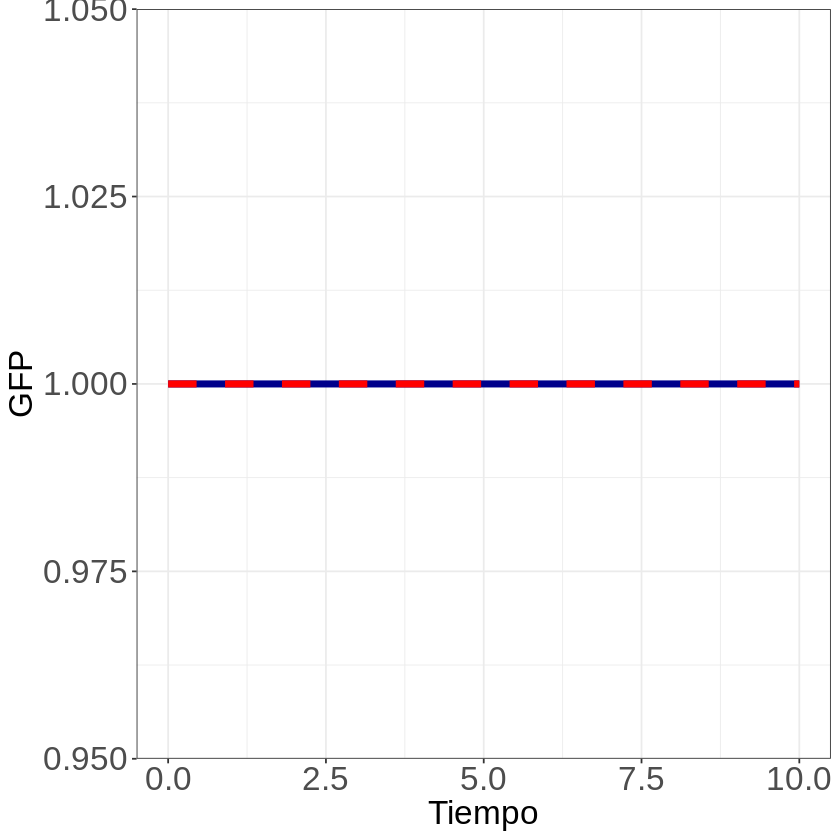

In [41]:
# mostrar fase estacionaria 
ggplot(out, aes(x = time, y = GFP)) + 
     geom_line(lwd = 2, col = "darkblue") +
     geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
     col = "red", lty = 2, lwd = 2) +
     xlab("Tiempo") +
     ylab("GFP") + 
     theme_bw() + 
     theme(legend.position = "none",
     plot.title = element_text(size=25,face = "italic"),
     axis.text=element_text(size=20),
     axis.title=element_text(size=20),
     legend.title = element_text(size=20), 
     legend.text = element_text(size=20))


# 3. Simular empleando el algoritmo de Euler-Maruyama

Ahora se repite la simulación empleando el método de Euler-Maruyama 

In [56]:
# simular utilizando el método de Euler-Maruyama
out <- run(state = s,after = "state<-state+rnorm(1,mean=0,sd=0.01)", timeplot = F, table = T)

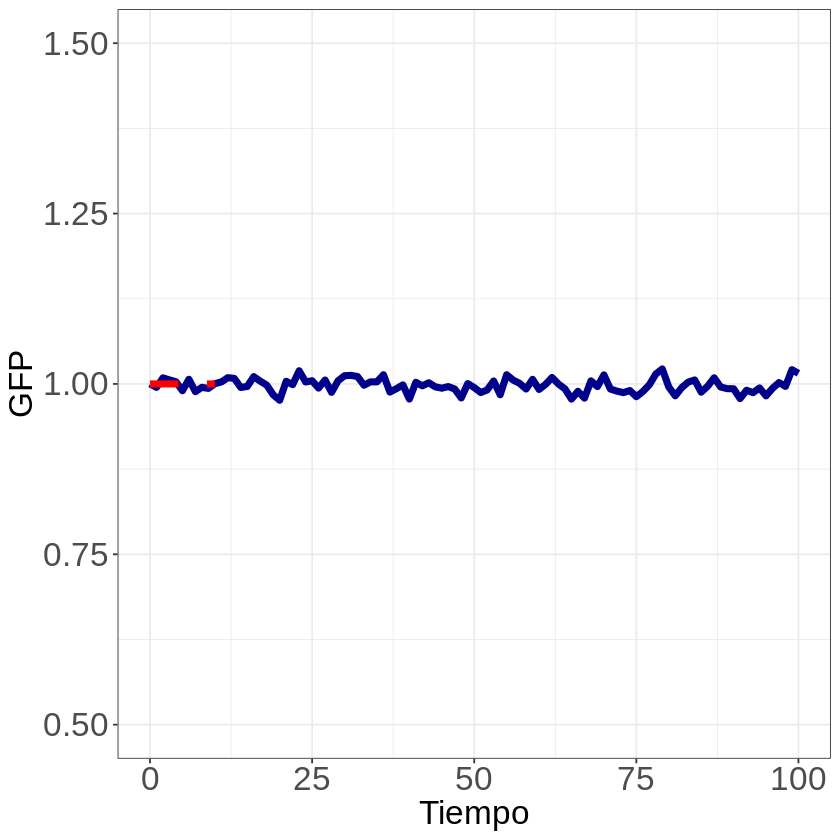

In [57]:
# mostrar fase estacionaria 
ggplot(out, aes(x = time, y = GFP)) + 
     geom_line(lwd = 2, col = "darkblue") +
     geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
     col = "red", lty = 2, lwd = 2) +
     xlab("Tiempo") +
     ylab("GFP") + 
     ylim(c(0.5,1.5))+
     theme_bw() + 
     theme(legend.position = "none",
     plot.title = element_text(size=25,face = "italic"),
     axis.text=element_text(size=20),
     axis.title=element_text(size=20),
     legend.title = element_text(size=20), 
     legend.text = element_text(size=20))


# 4. Realizar varias repeticiones y obtener la distribucción de $GFP_{final}$

Observemos que ocurre si se realiza esta simulación varias veces  

In [61]:
# número de iteraciones
iter <- 100

# matriz para guardar el valor de GFP al final de cada simulación 
GFP_end <- matrix(nrow = iter, ncol = 1)

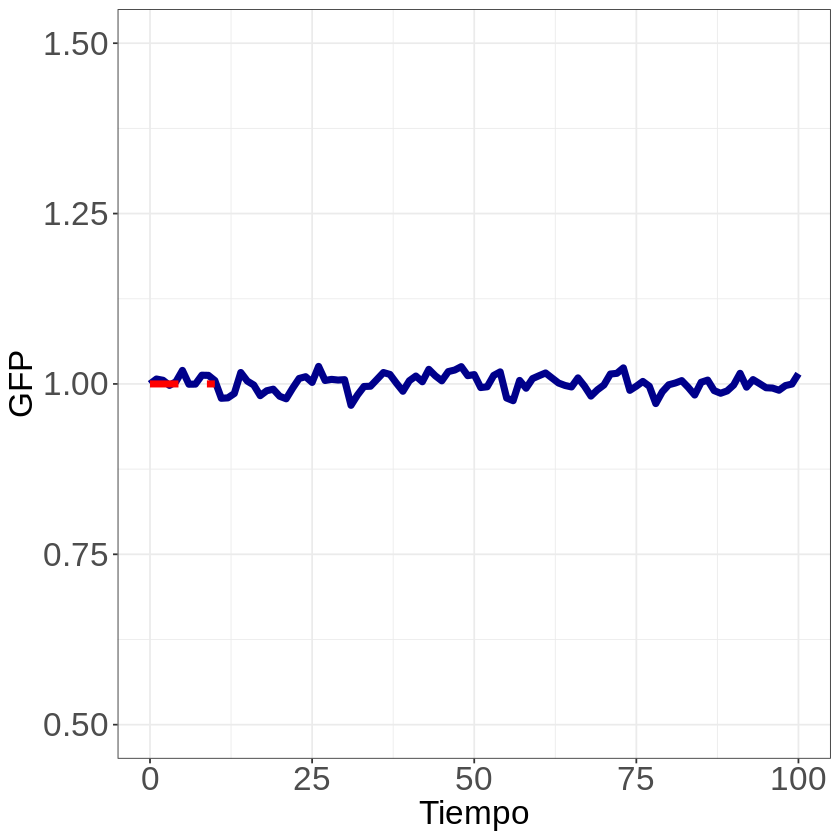

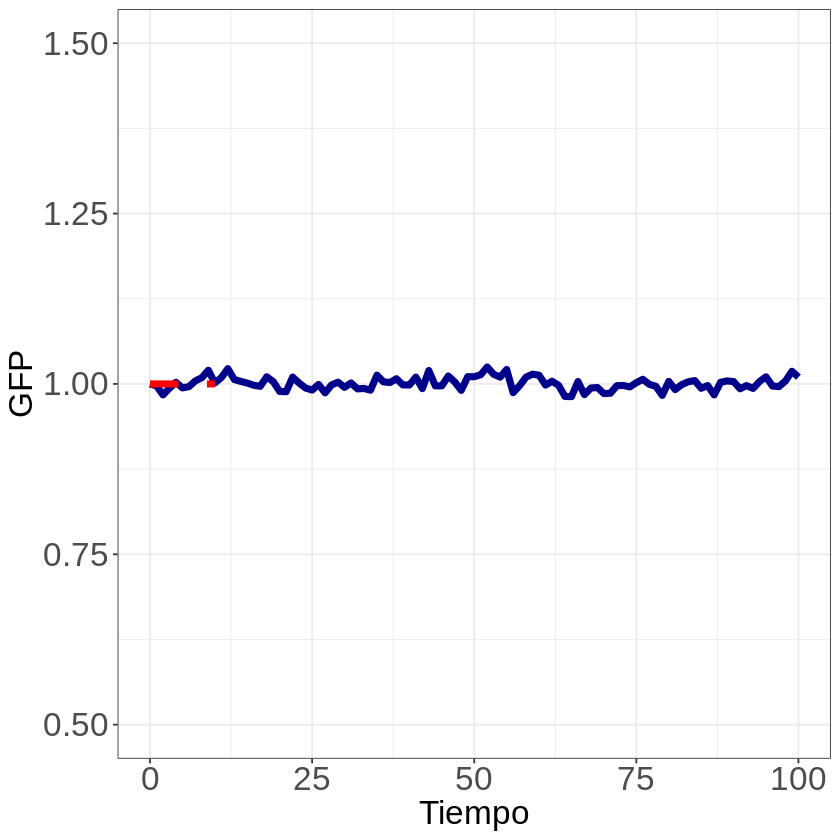

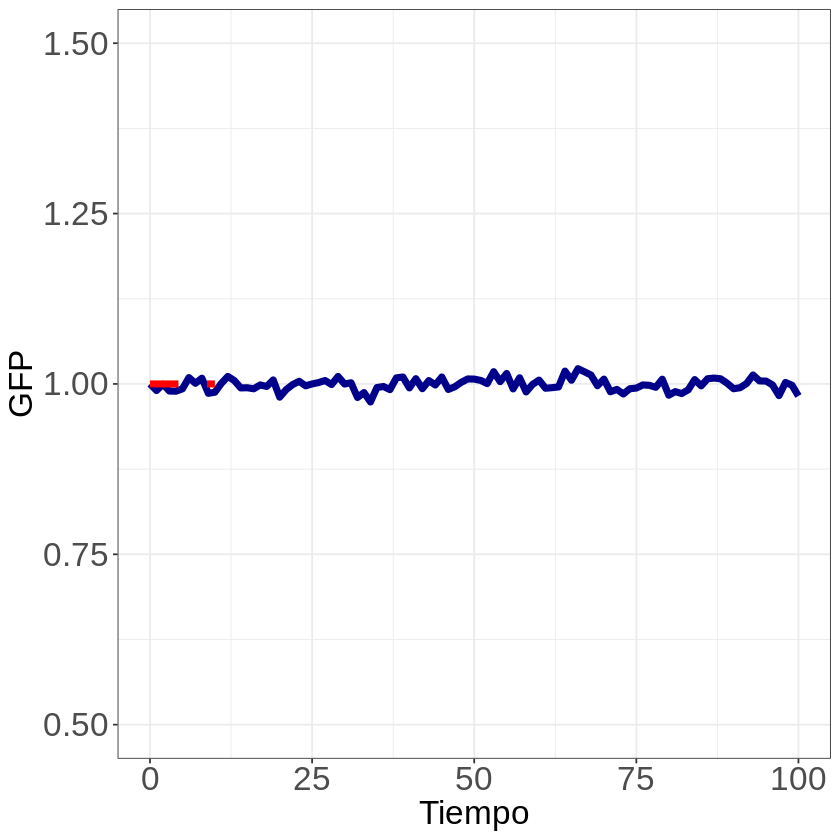

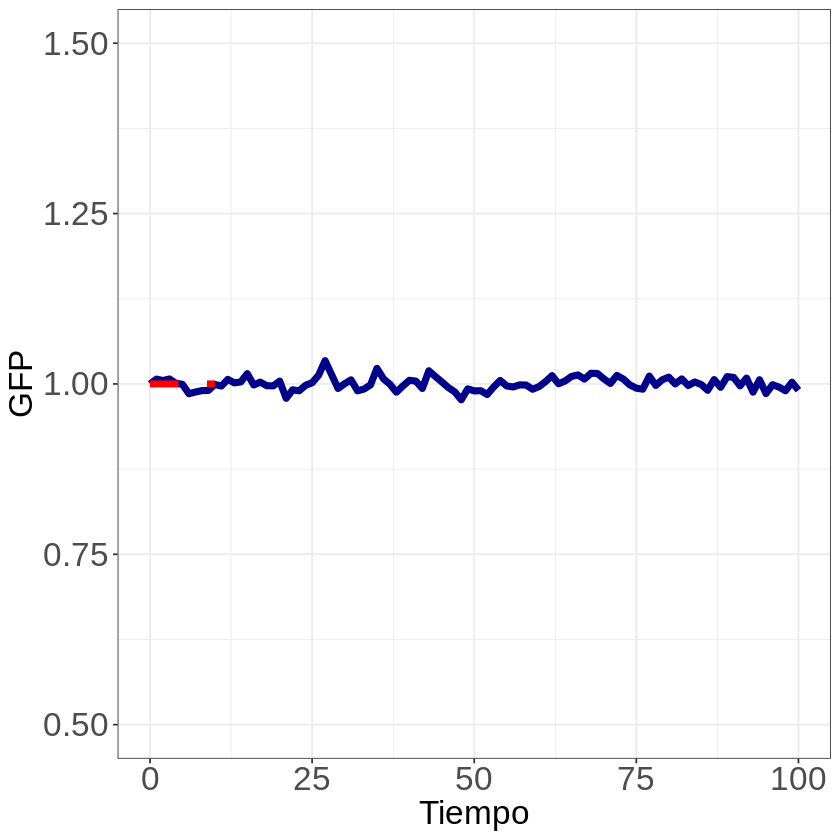

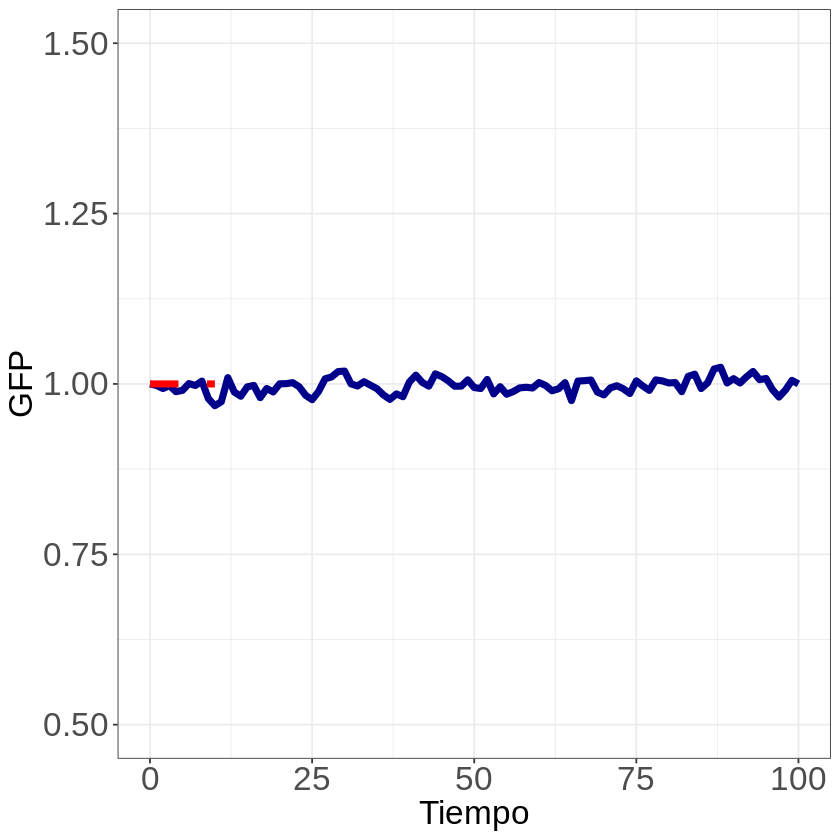

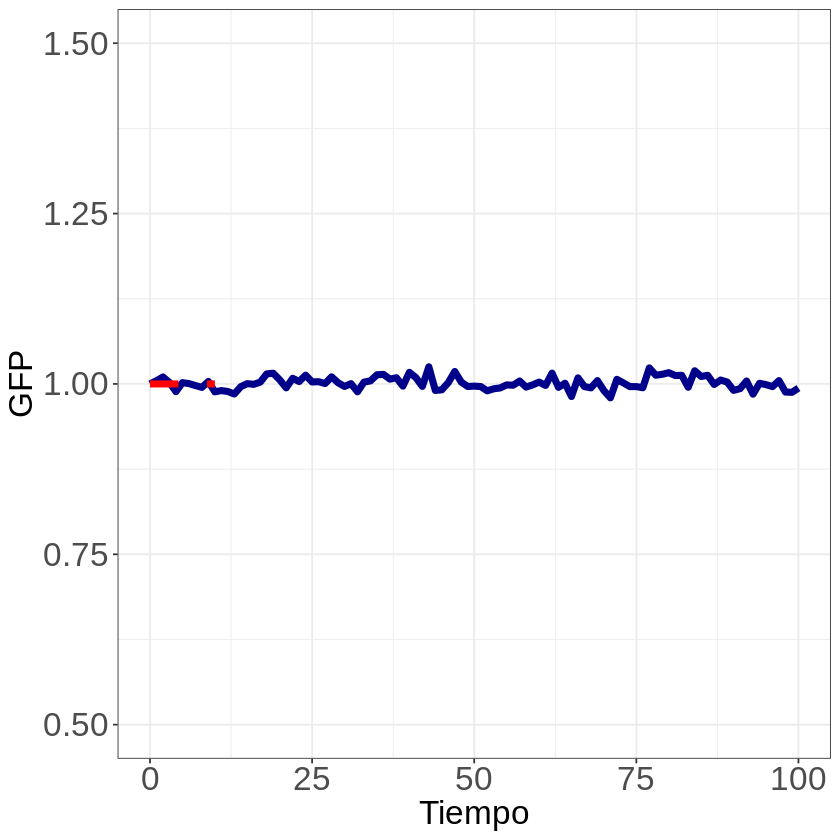

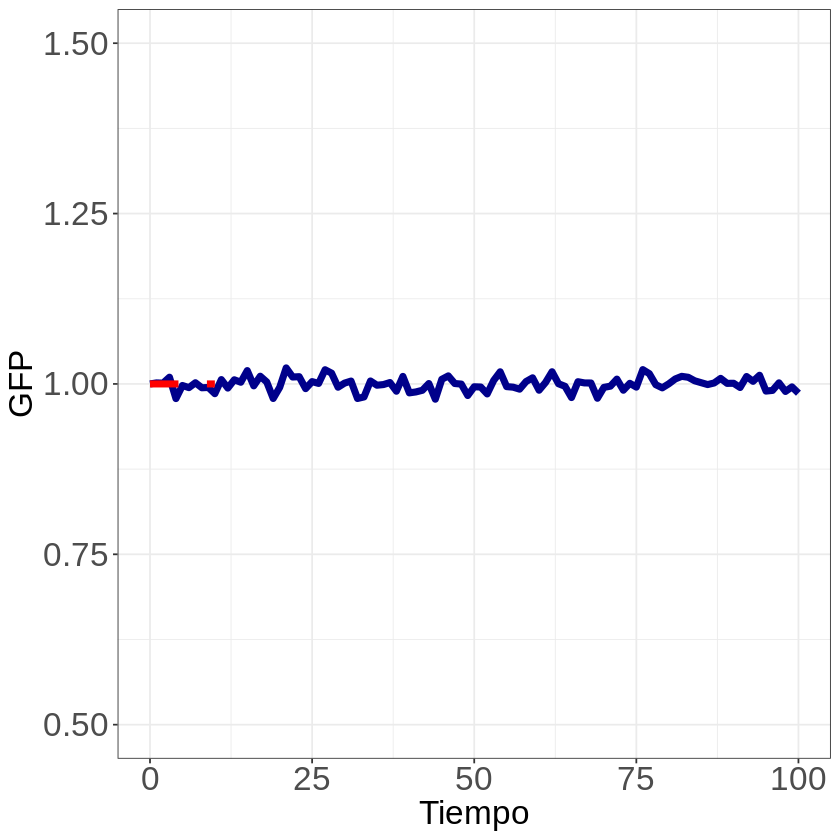

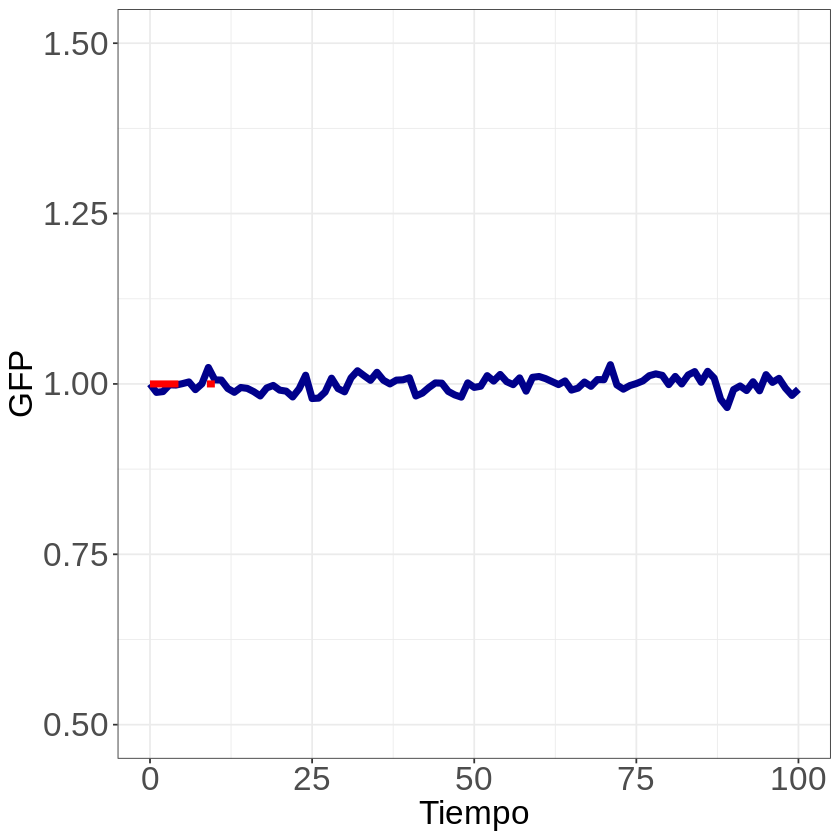

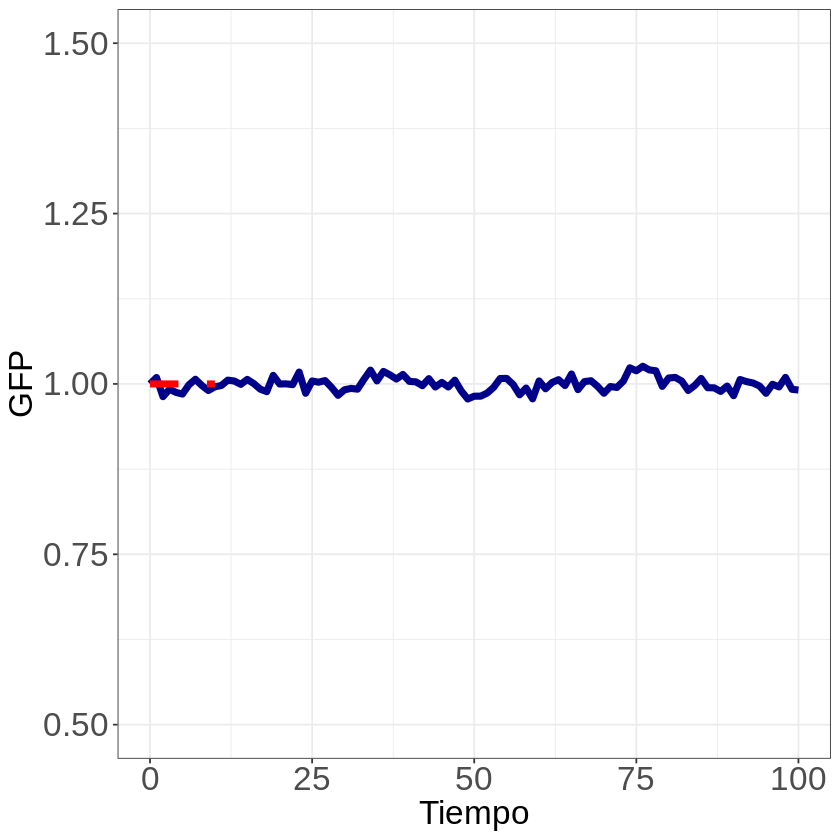

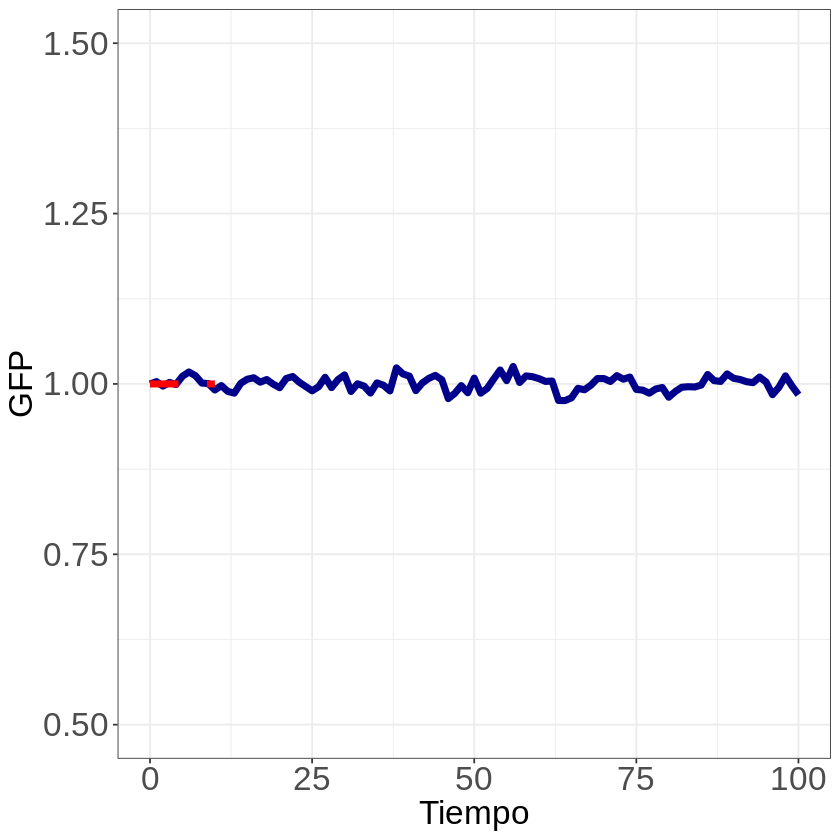

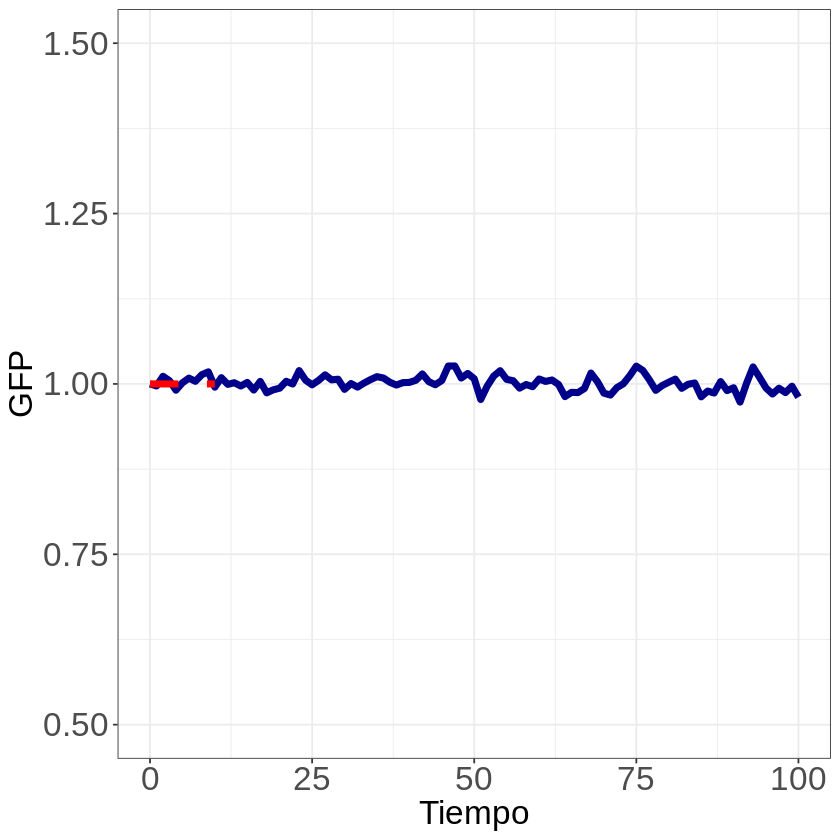

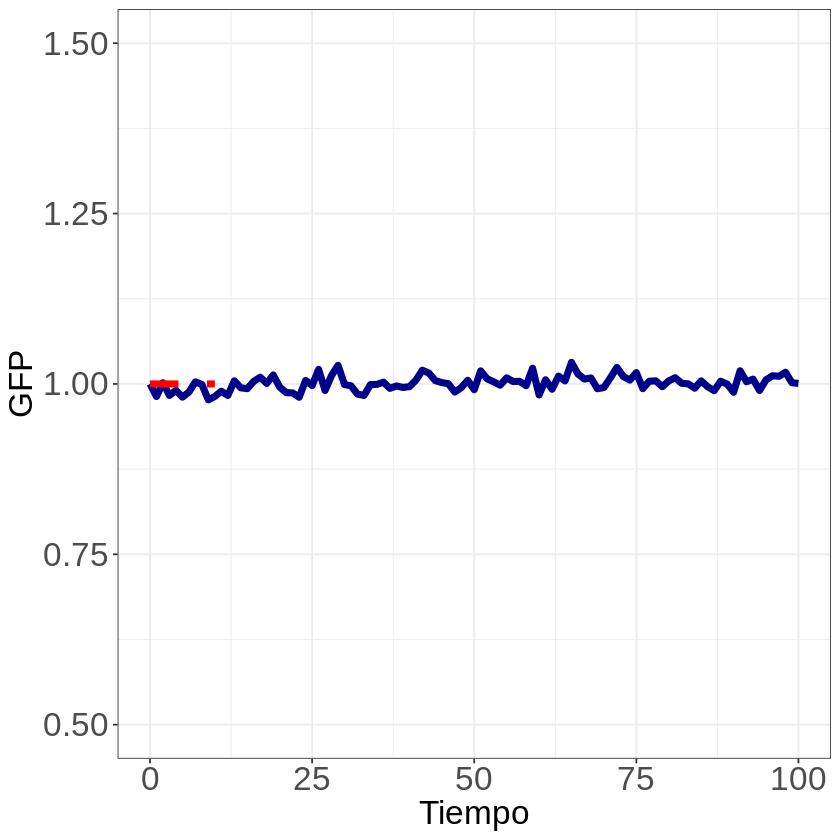

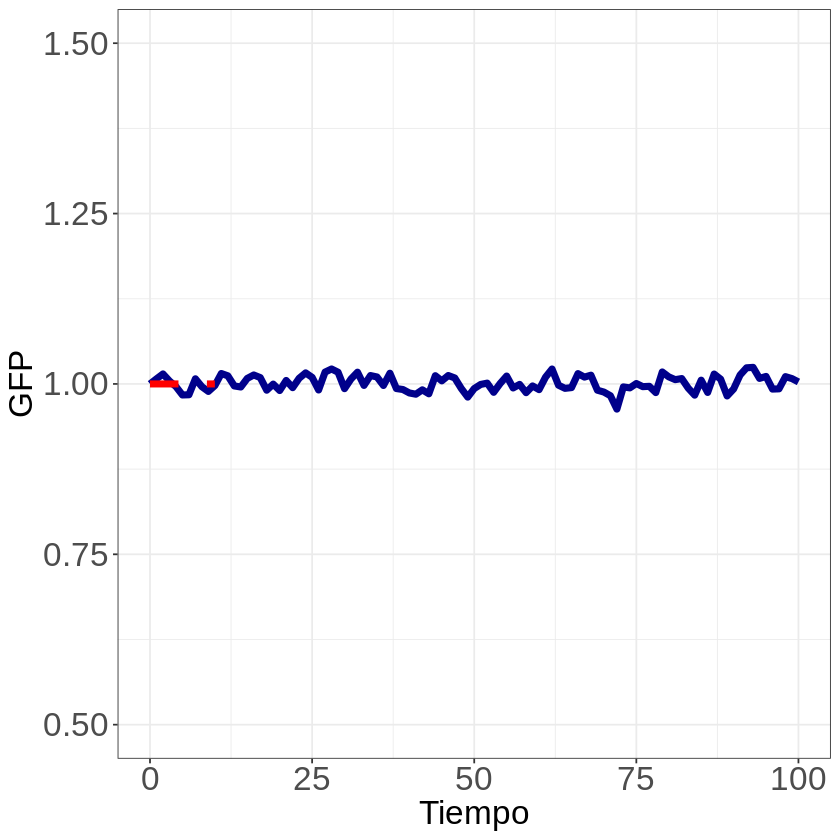

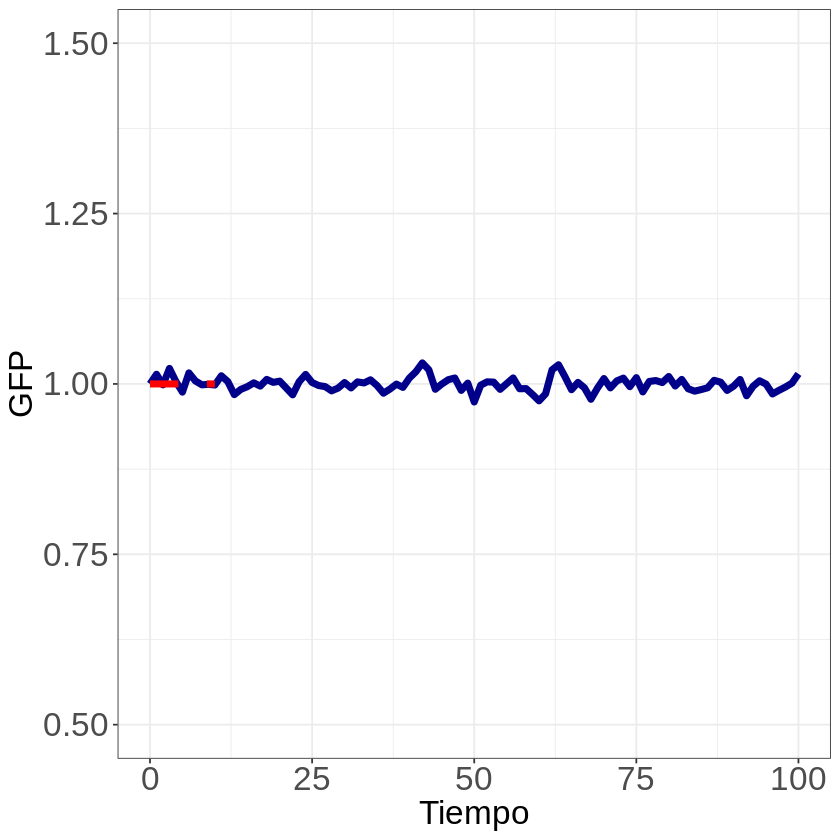

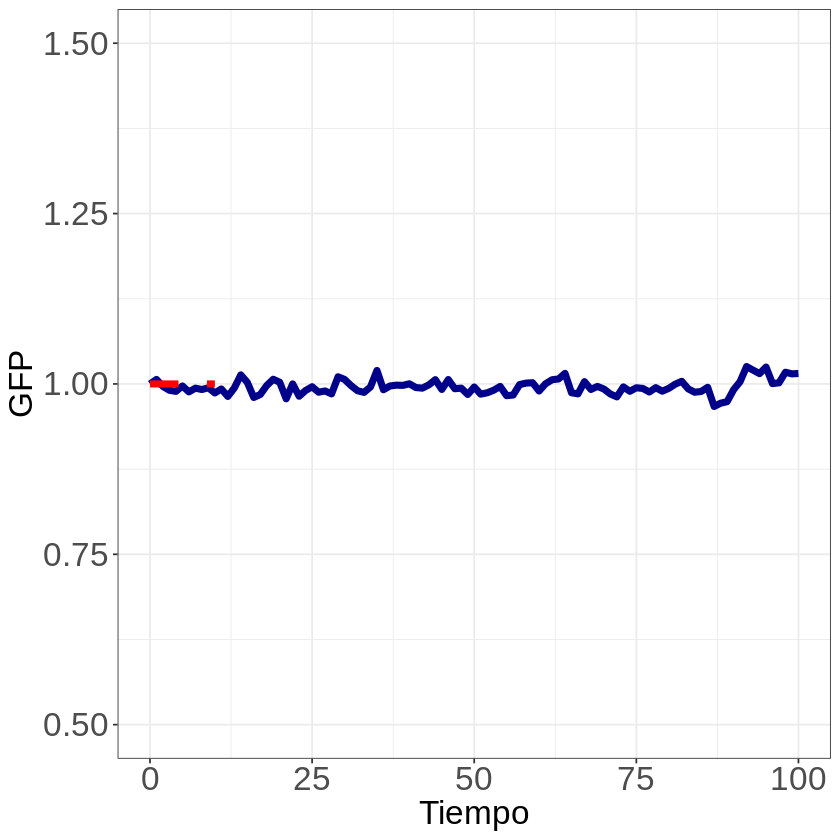

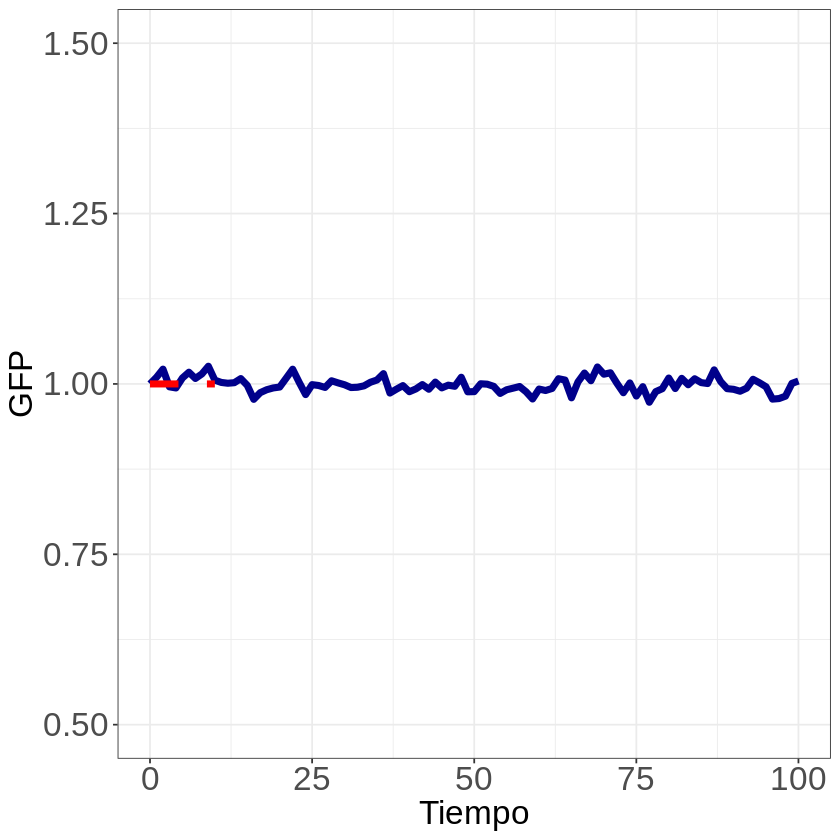

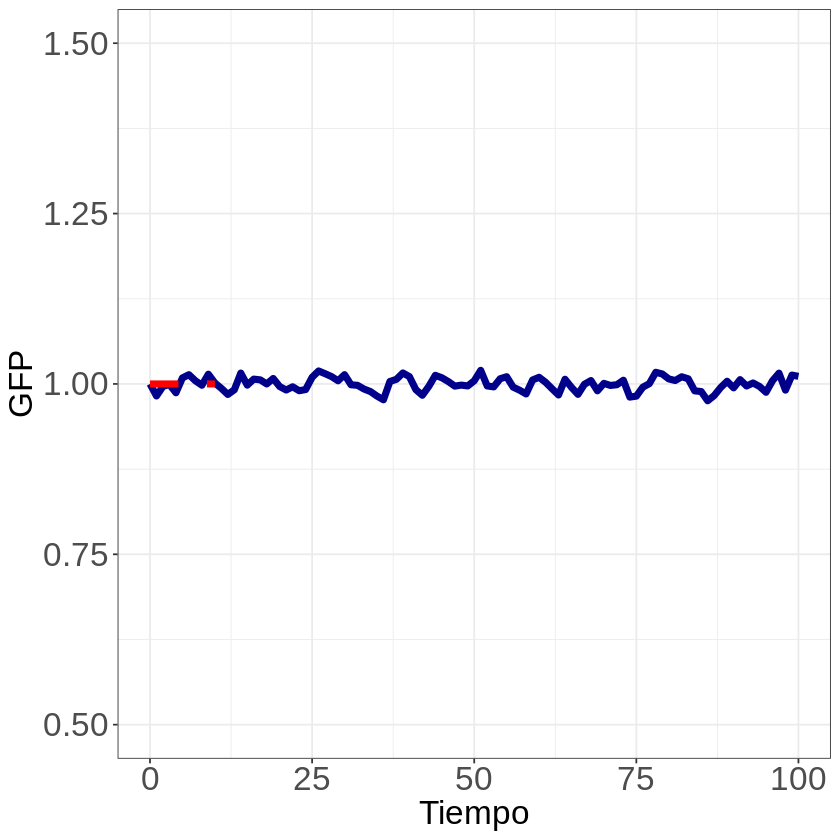

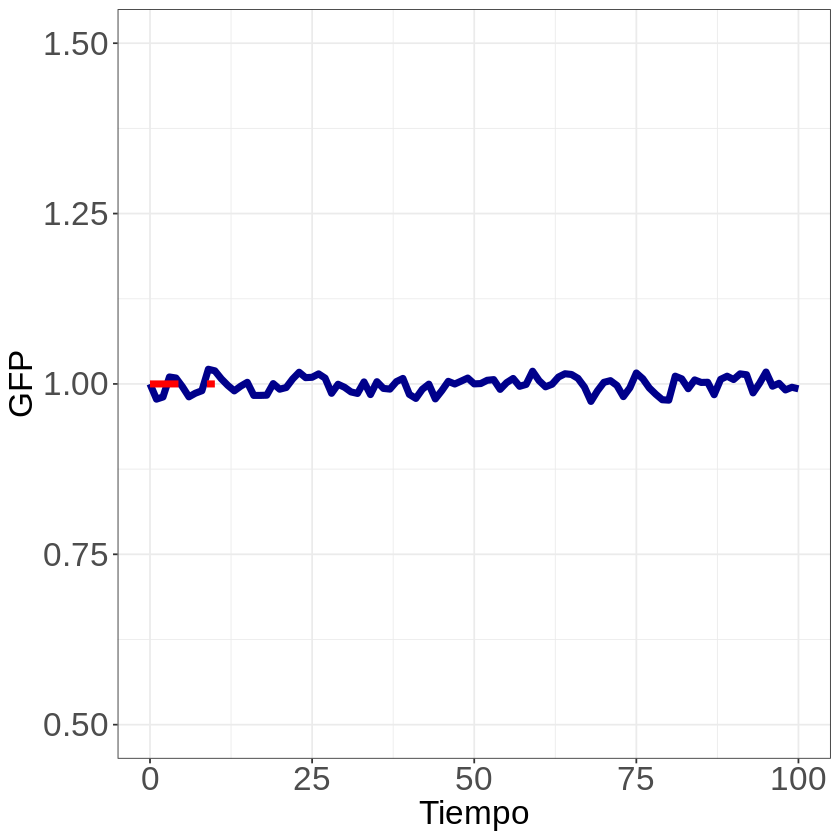

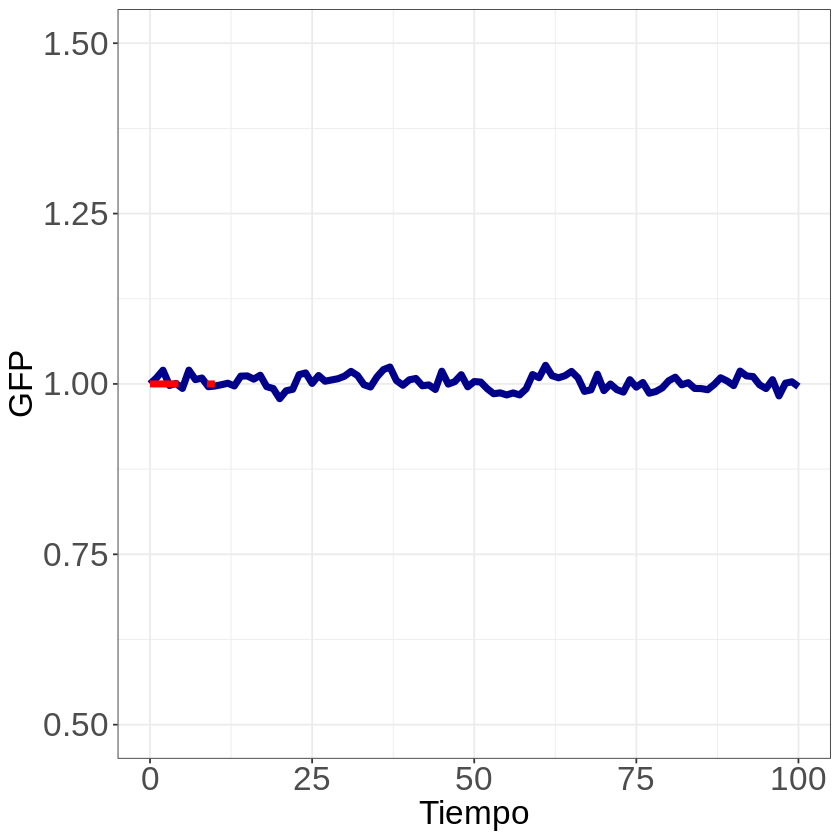

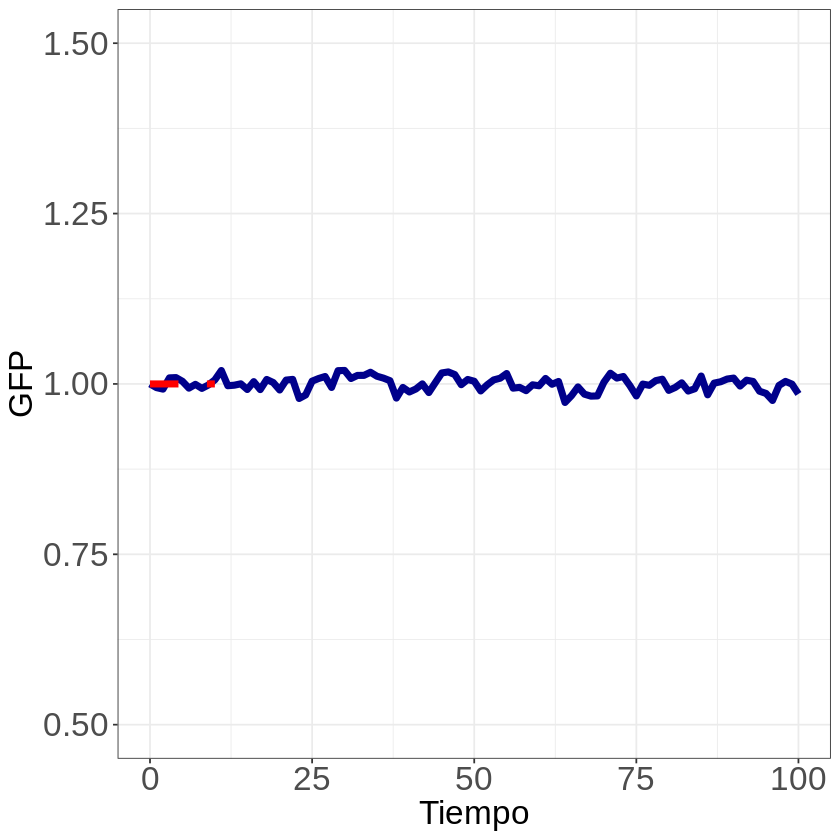

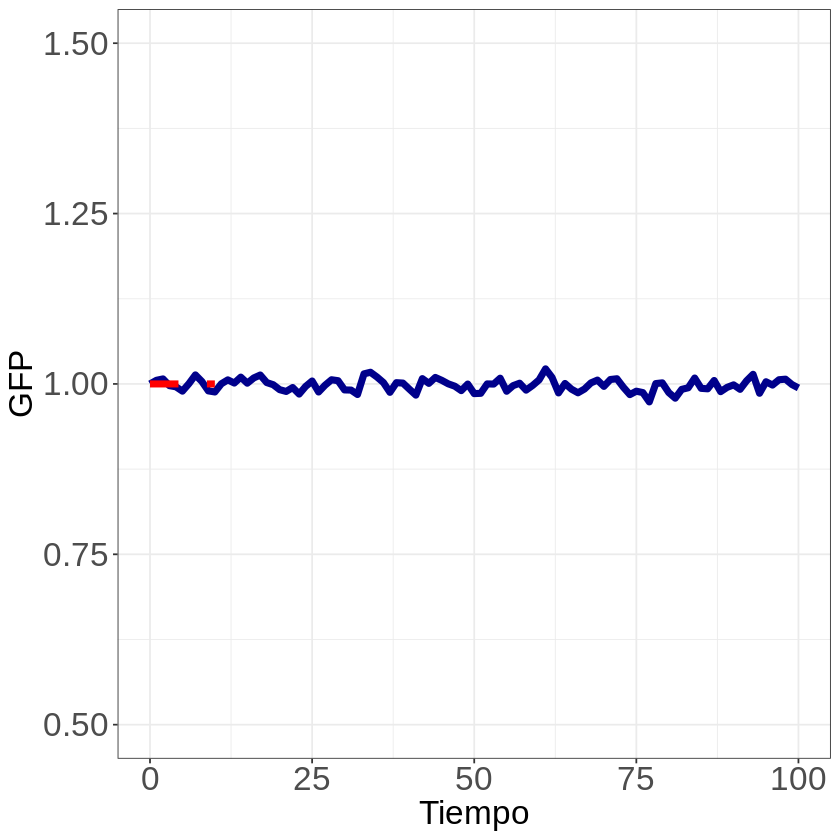

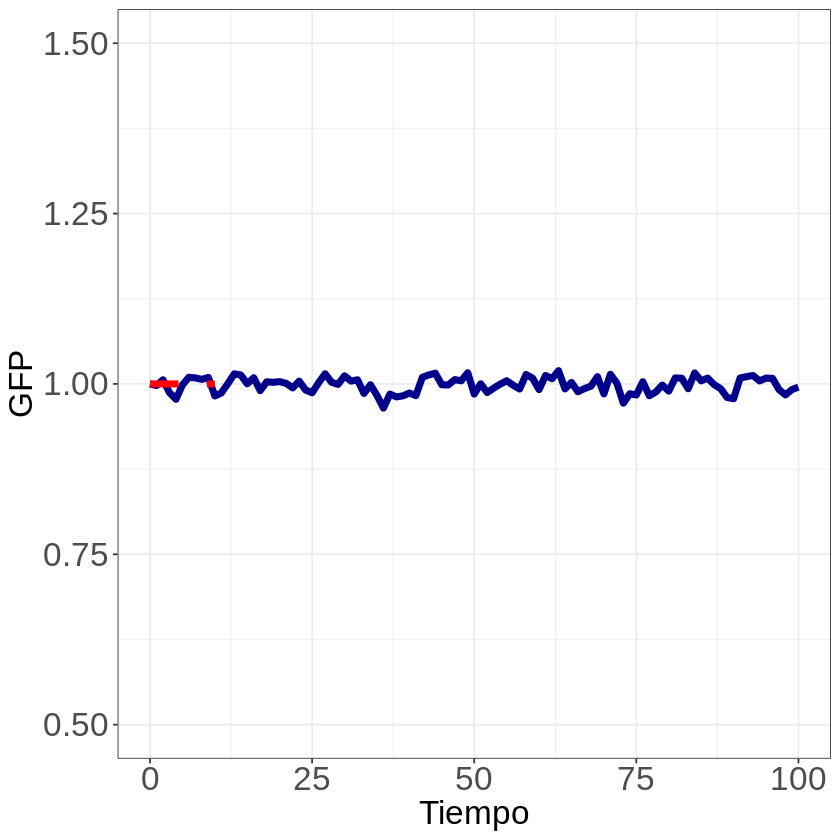

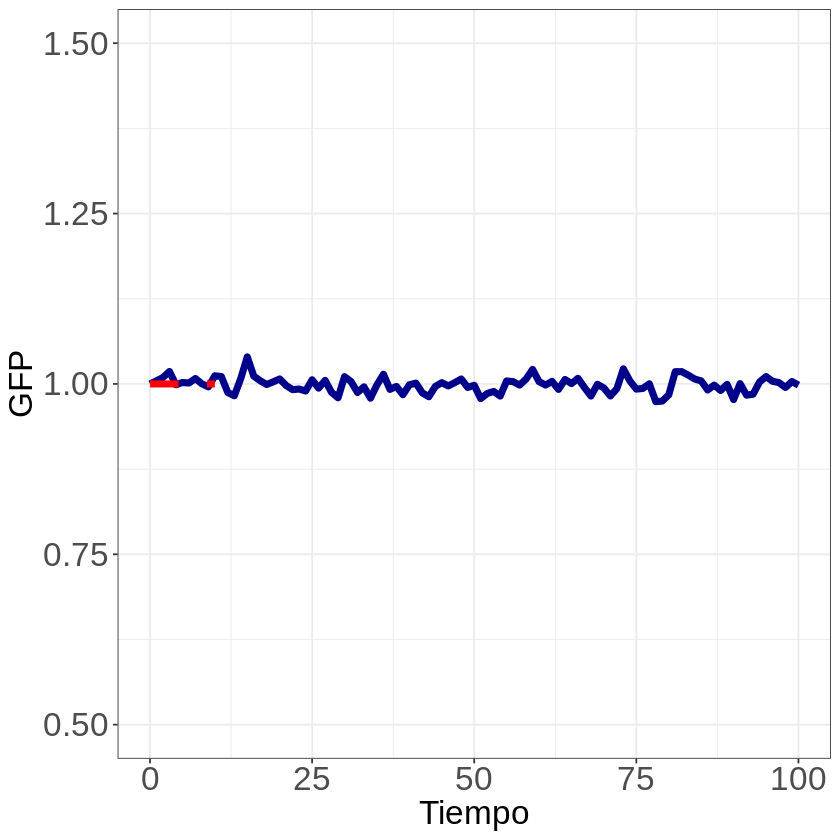

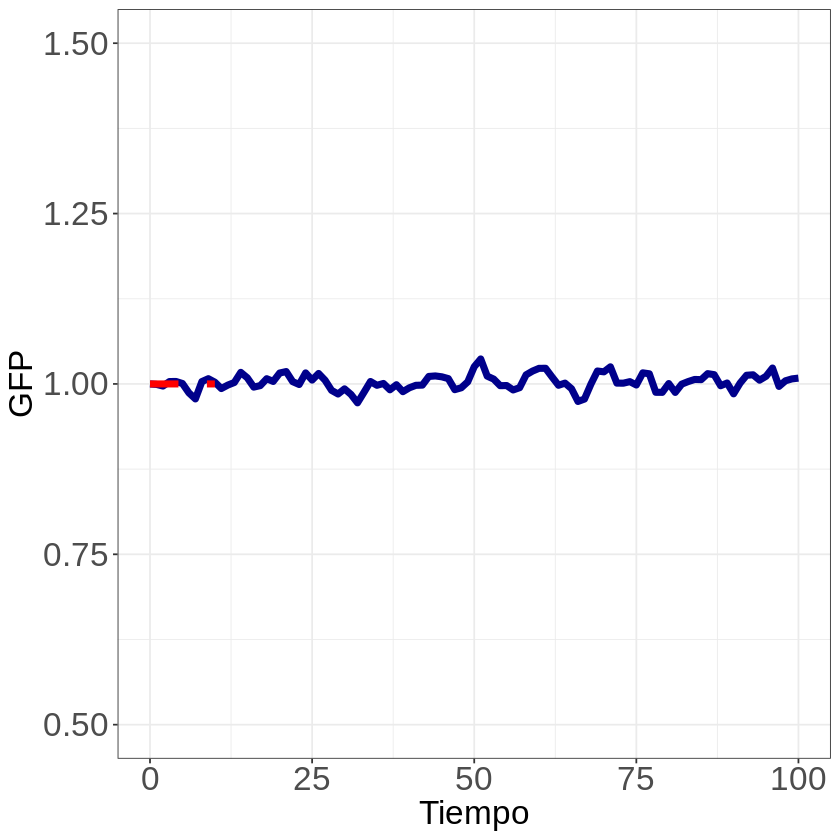

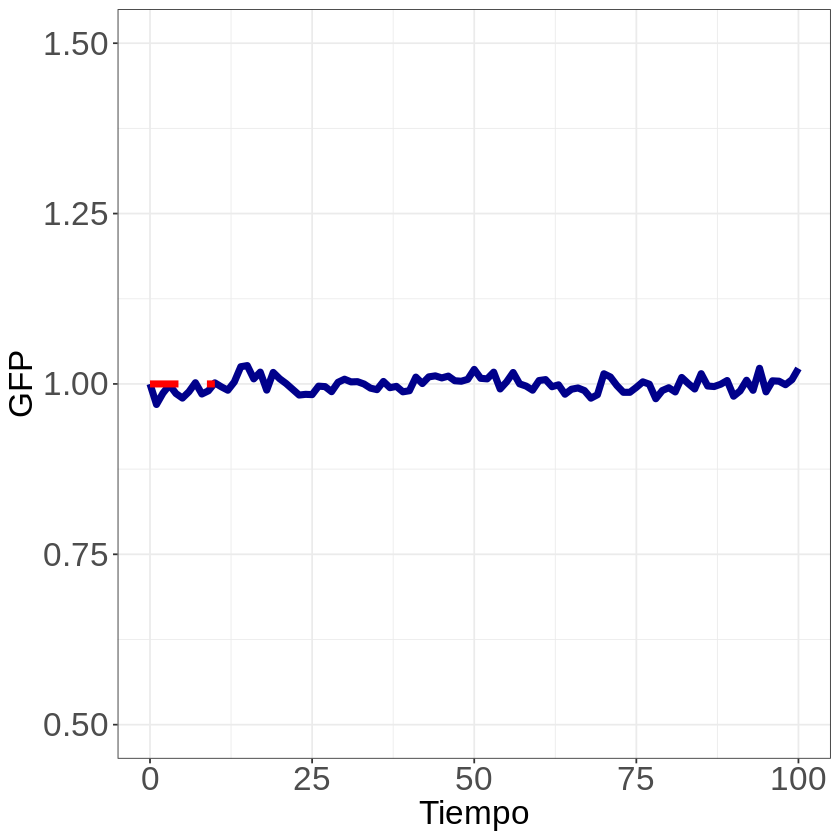

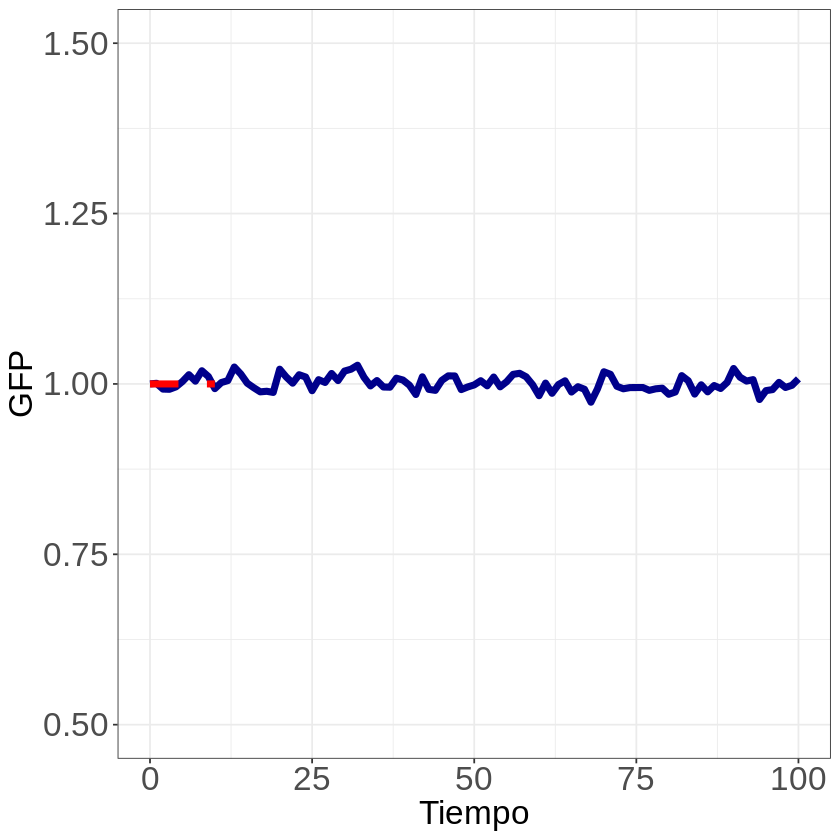

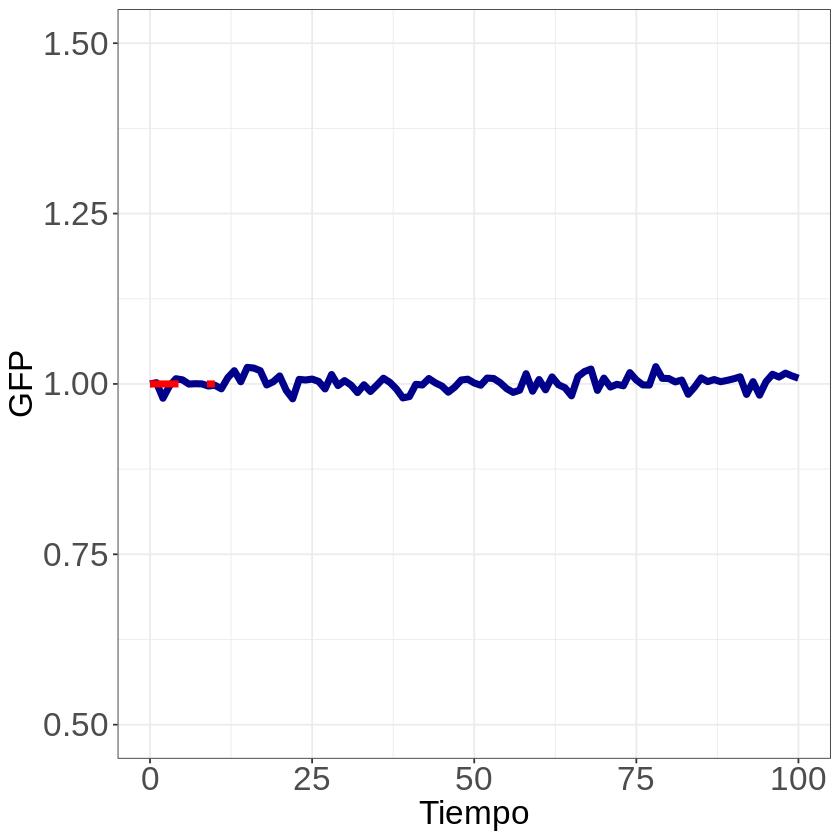

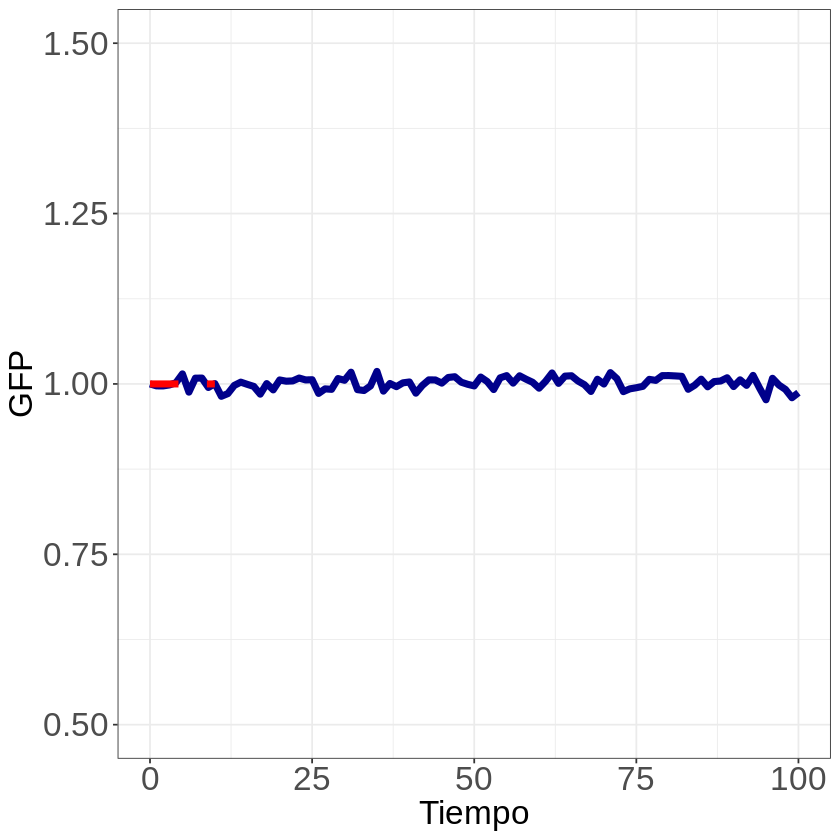

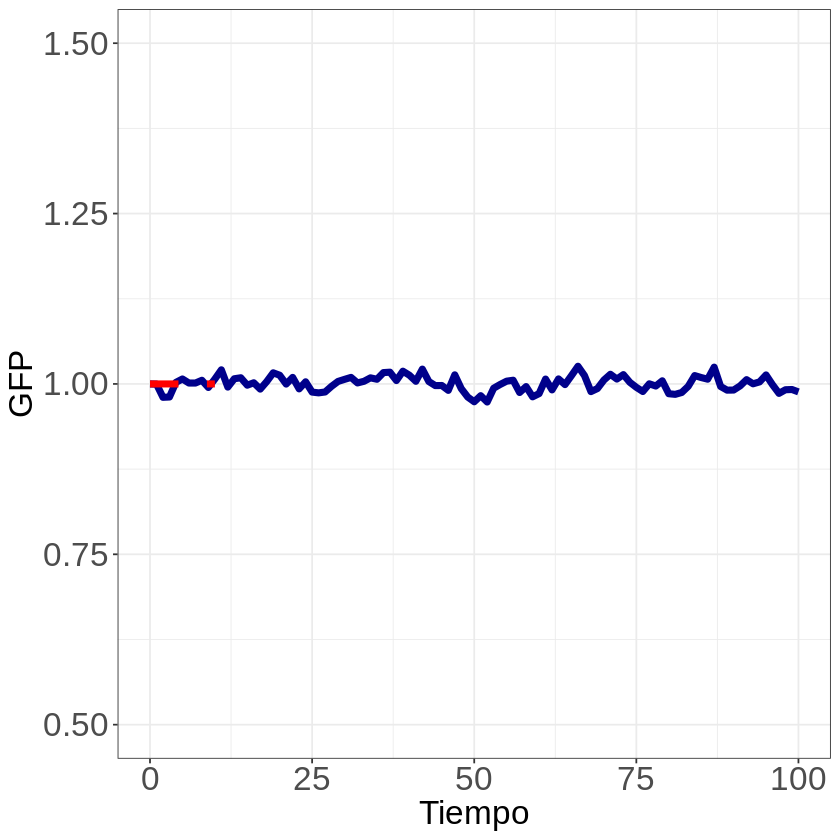

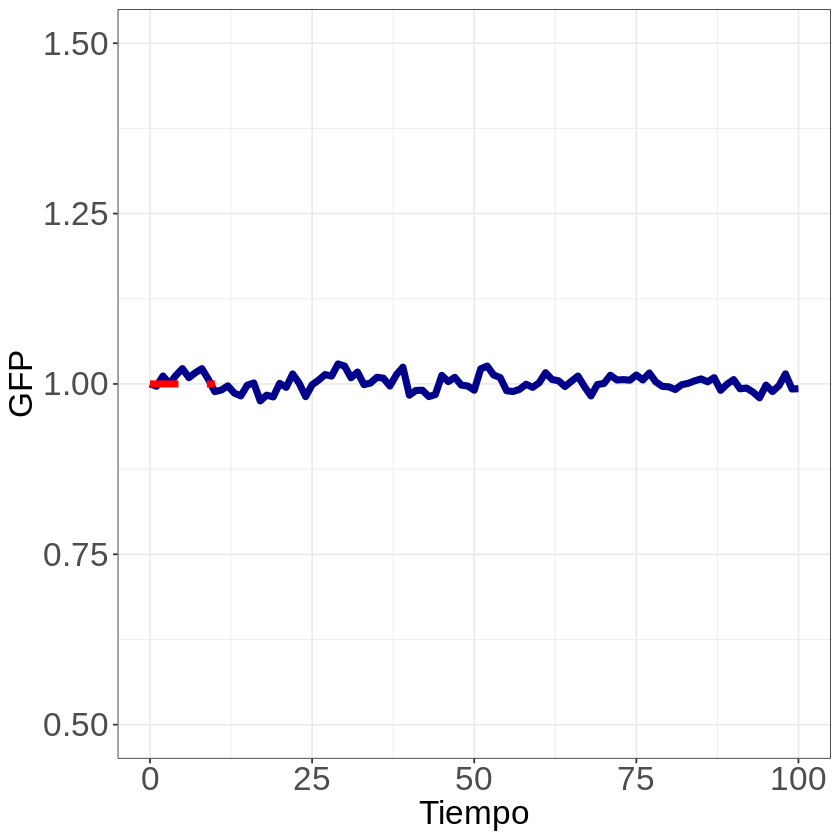

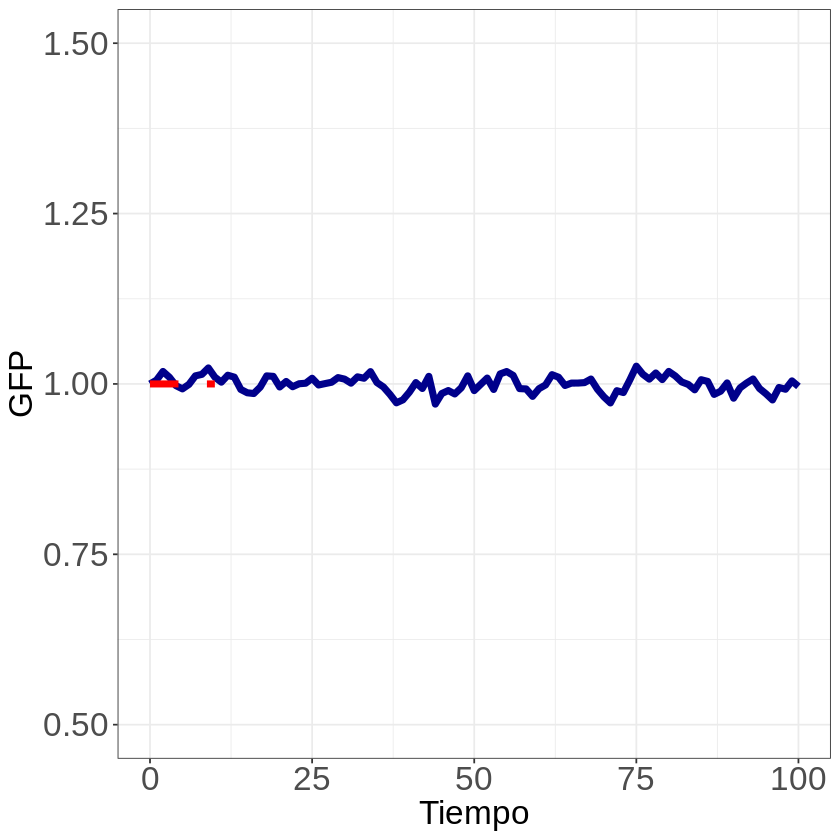

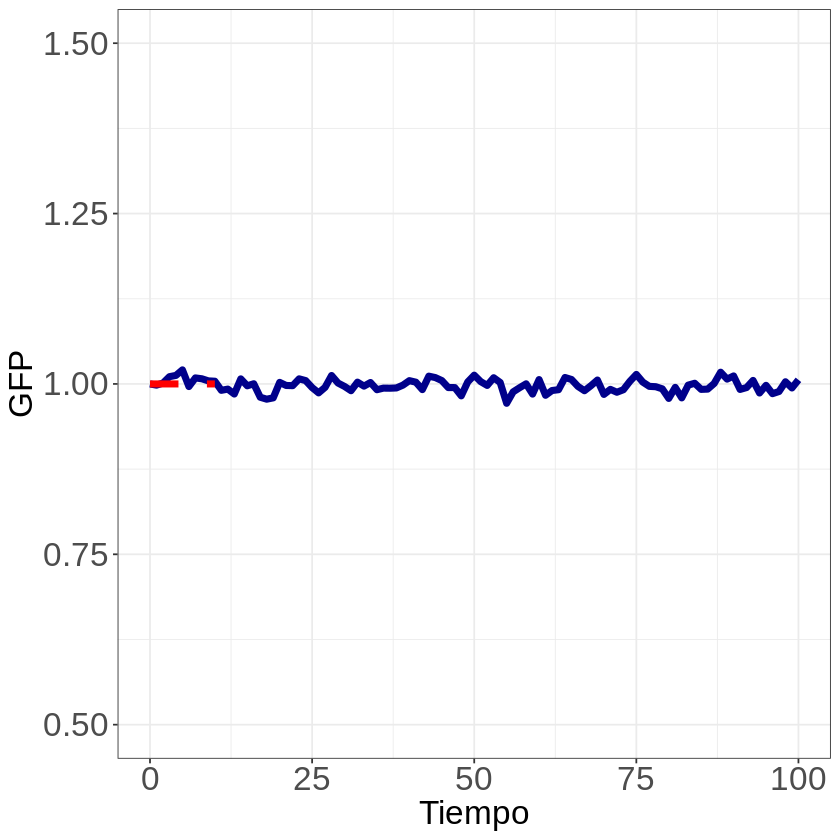

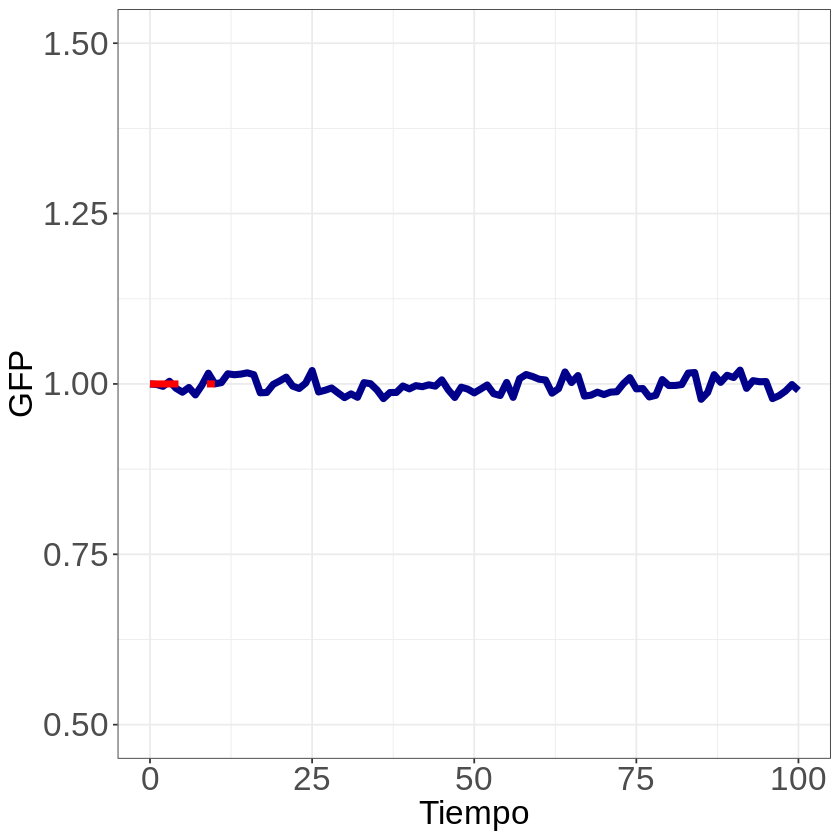

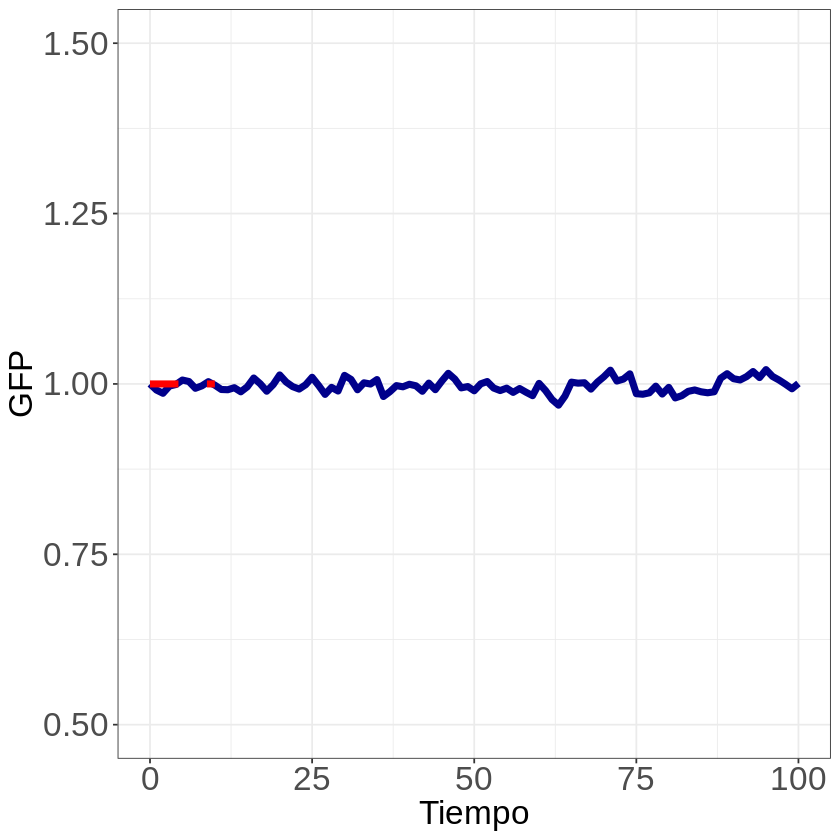

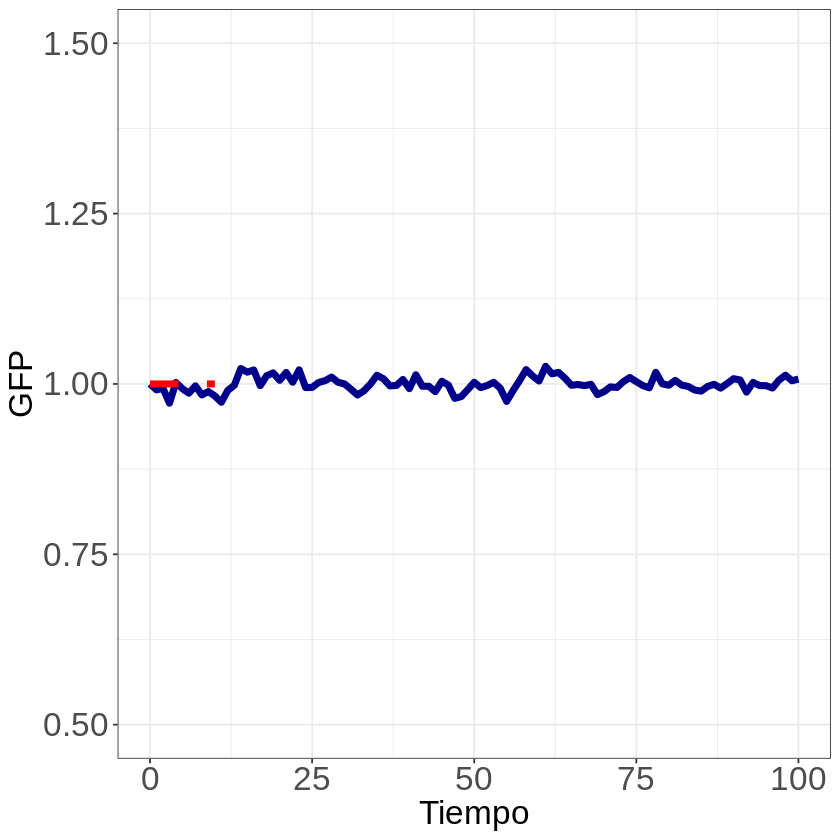

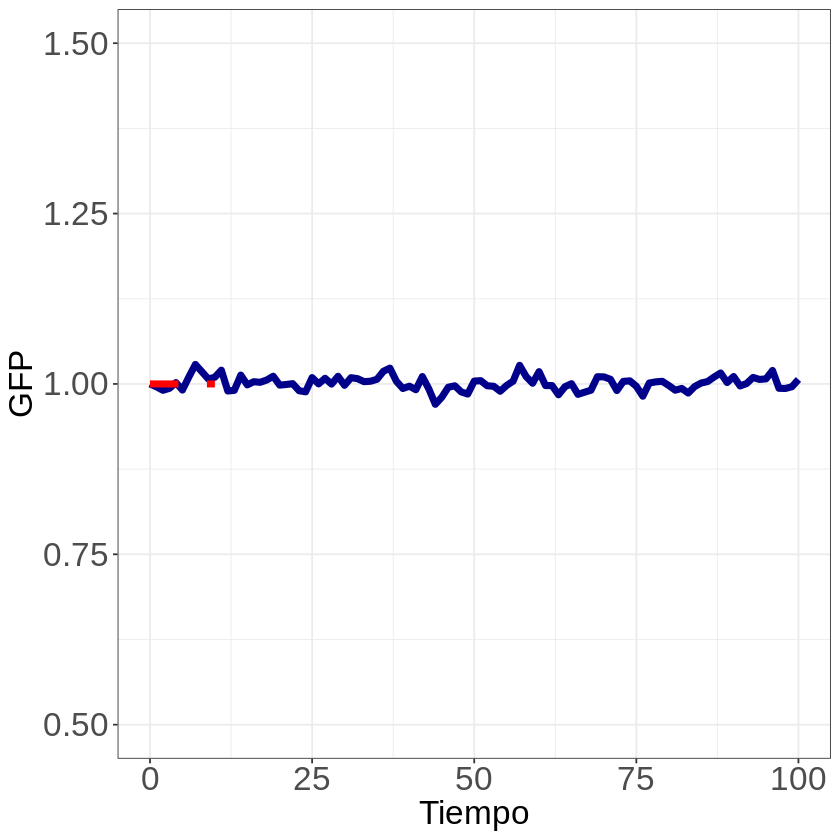

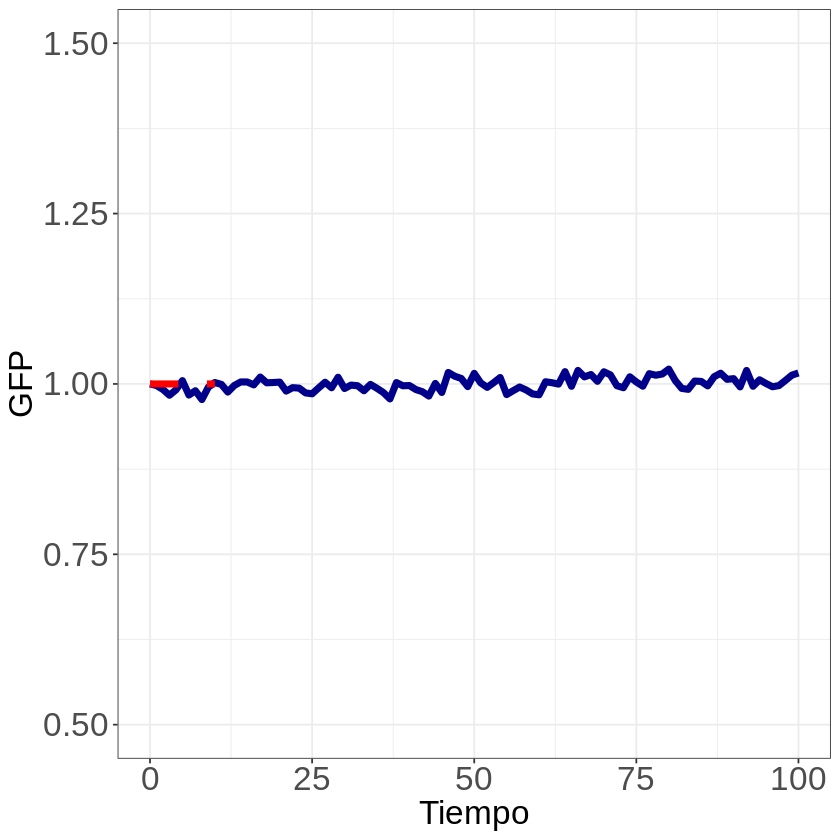

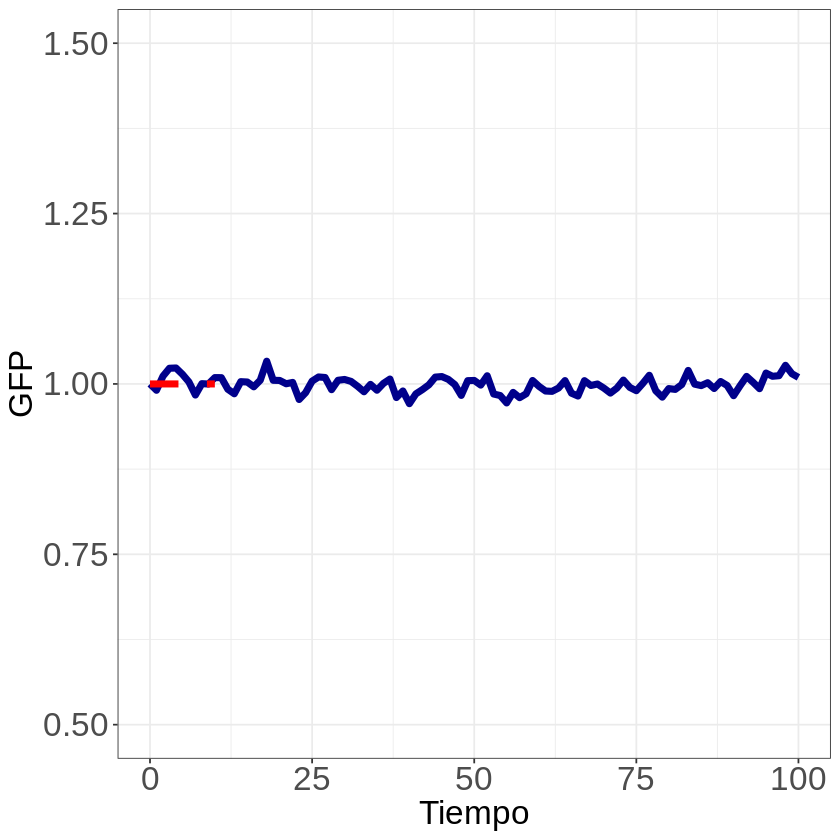

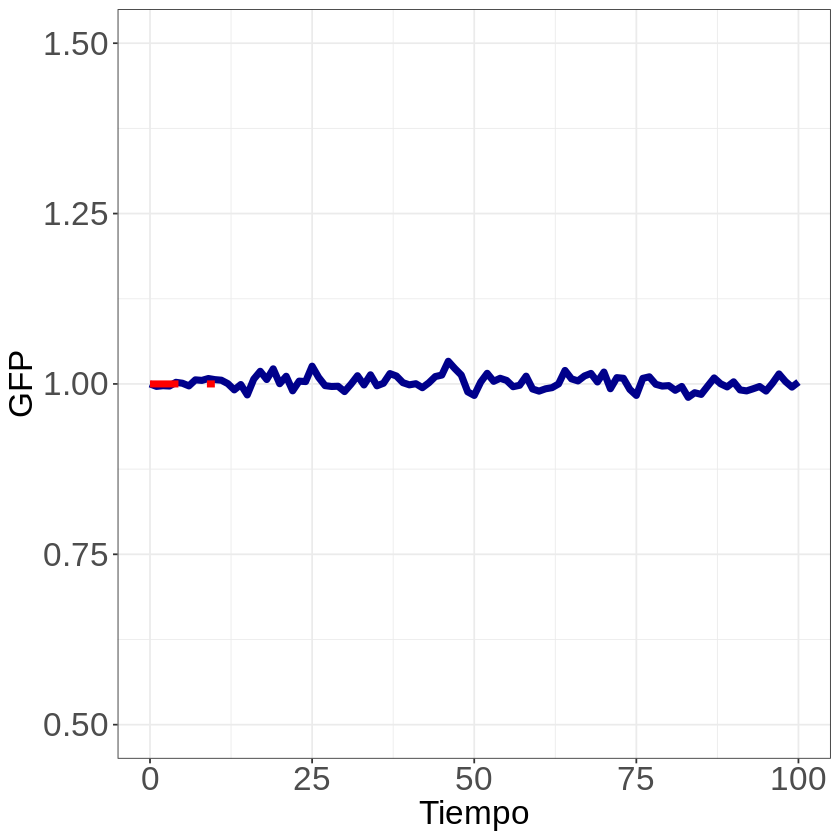

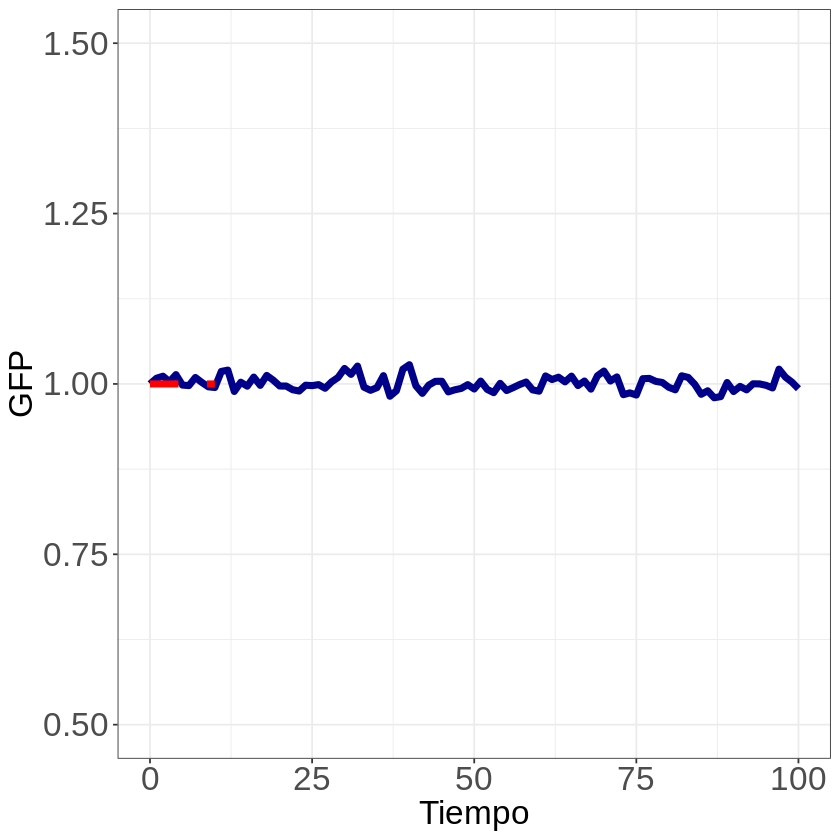

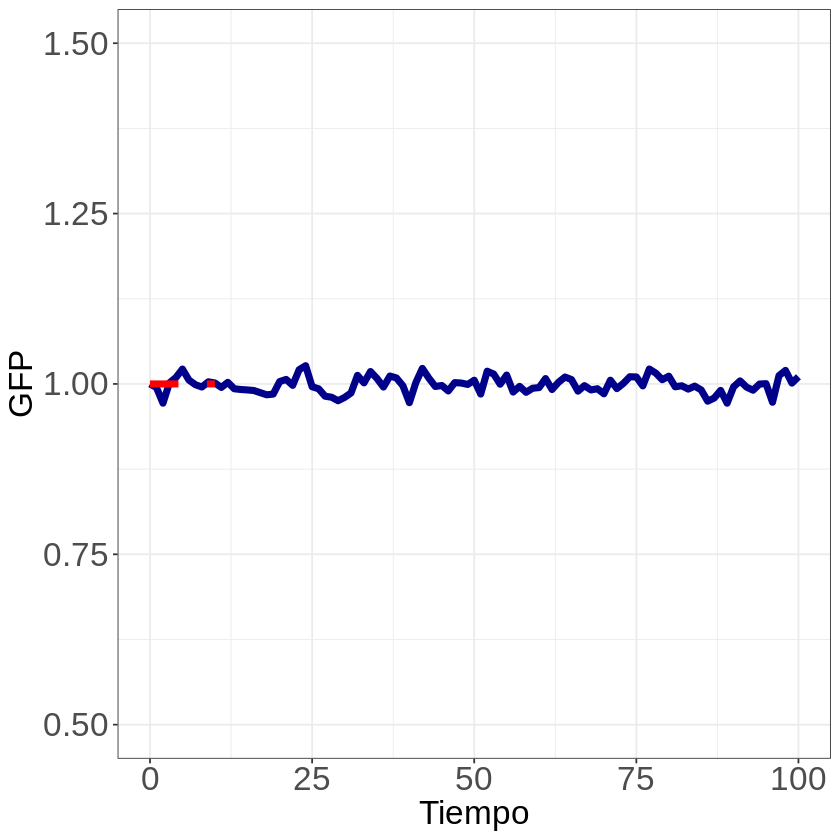

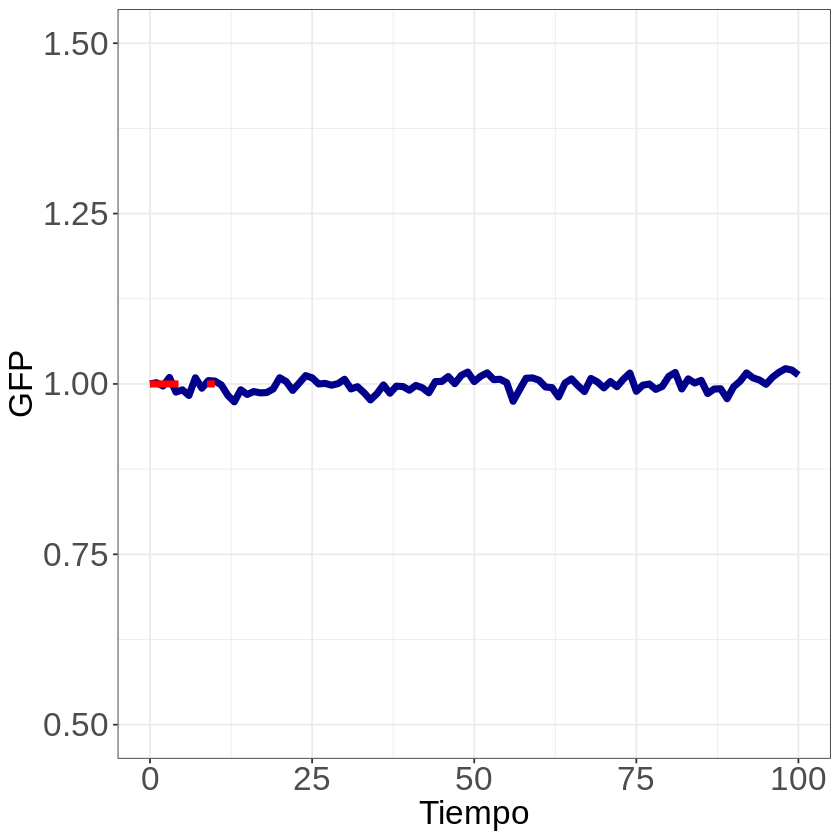

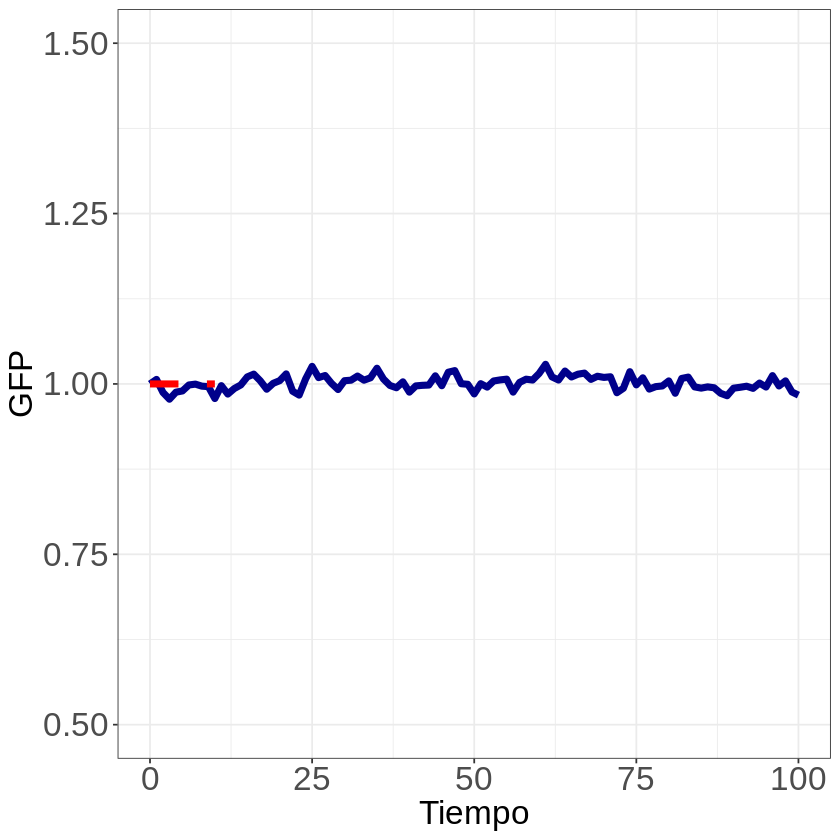

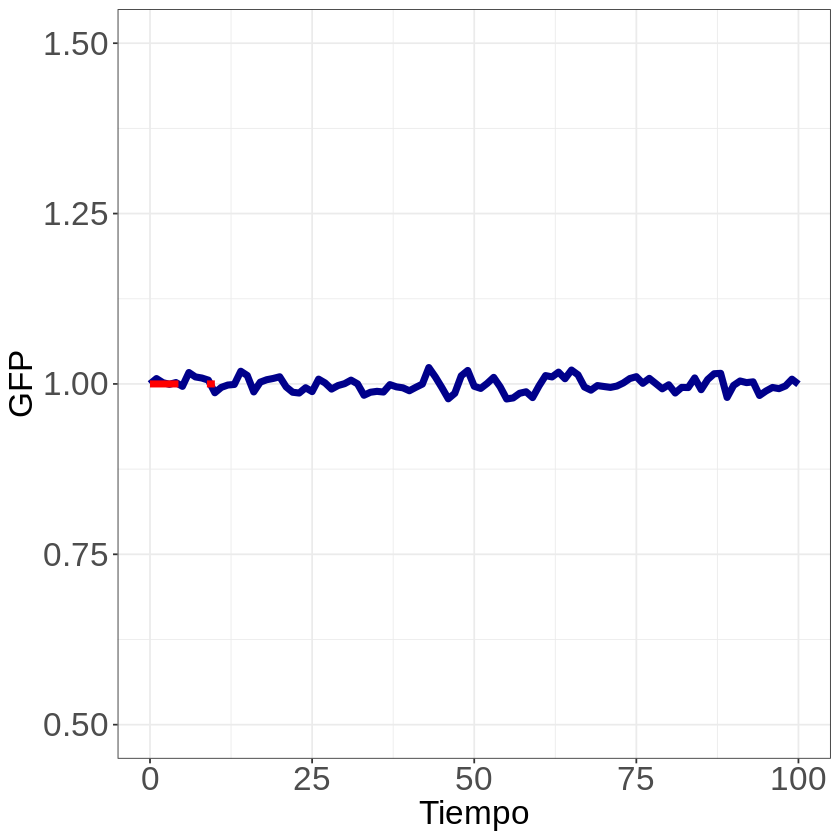

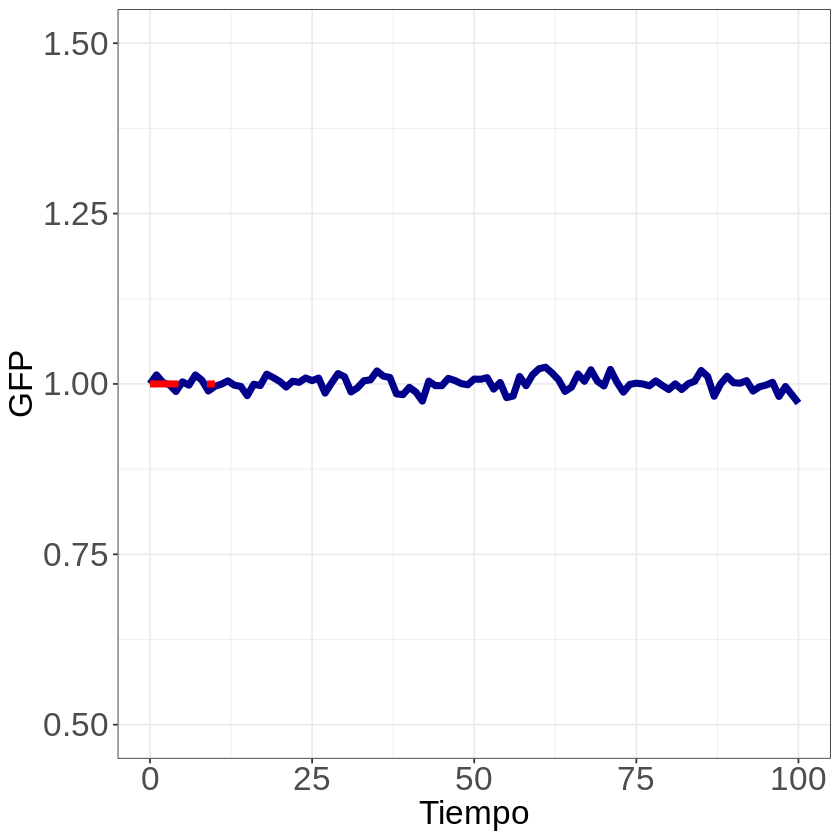

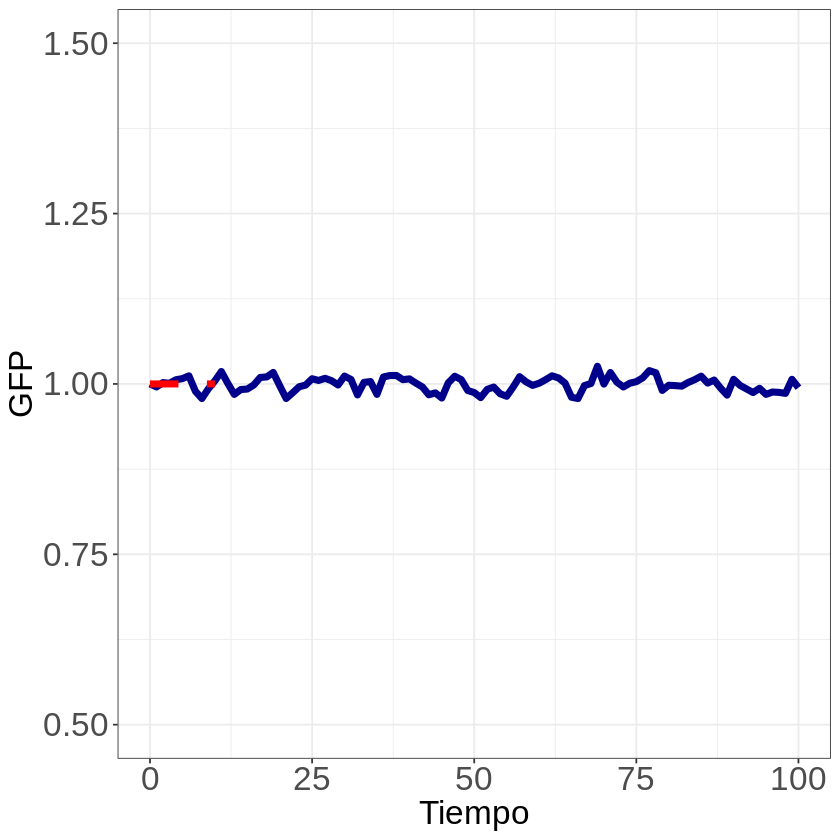

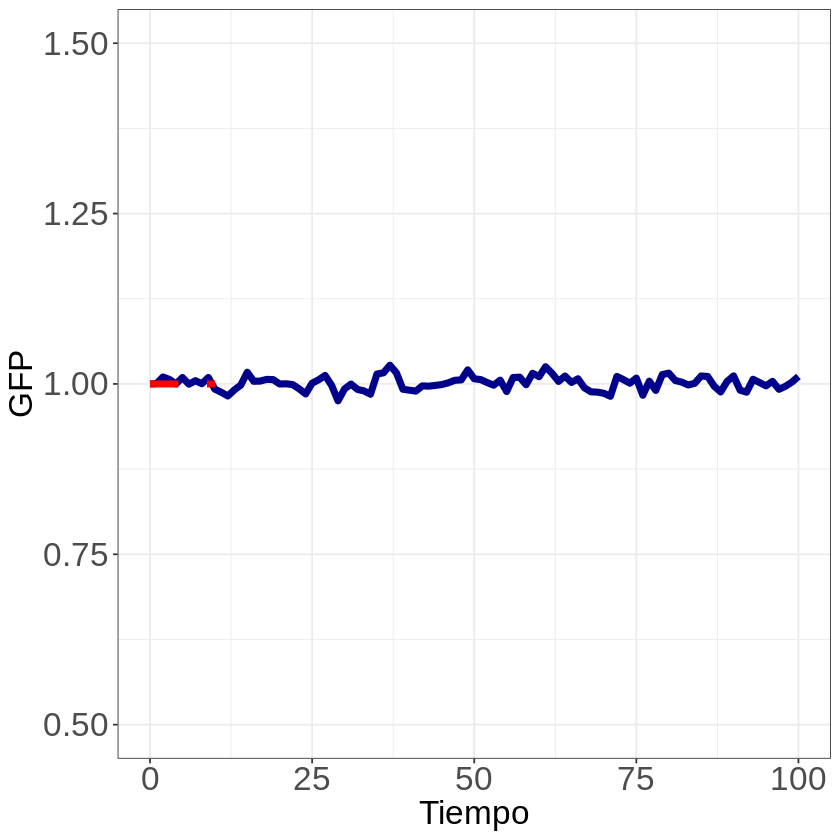

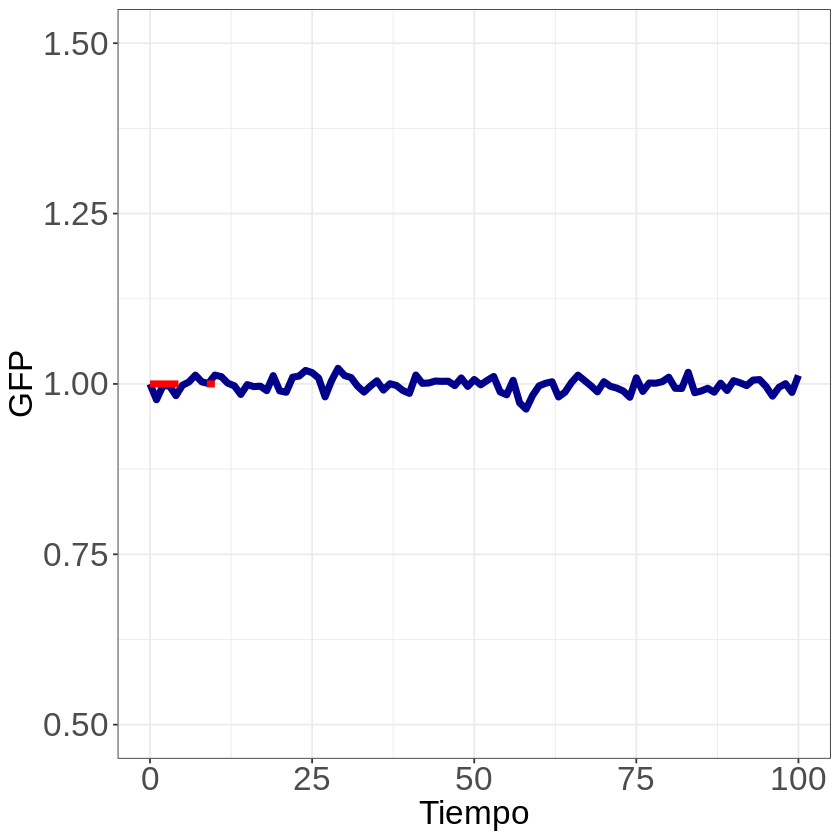

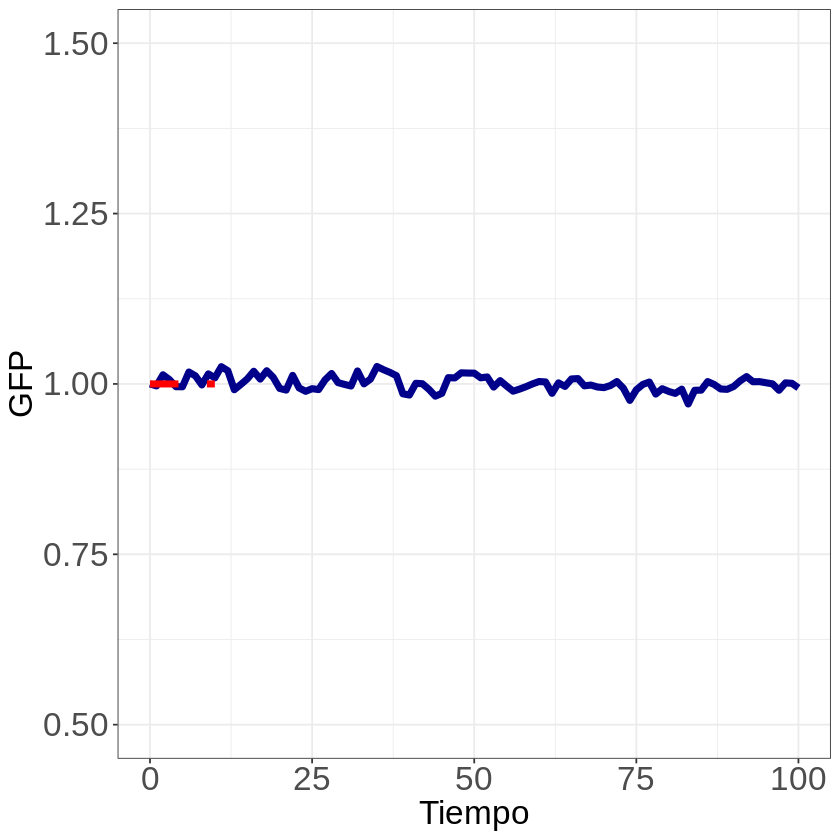

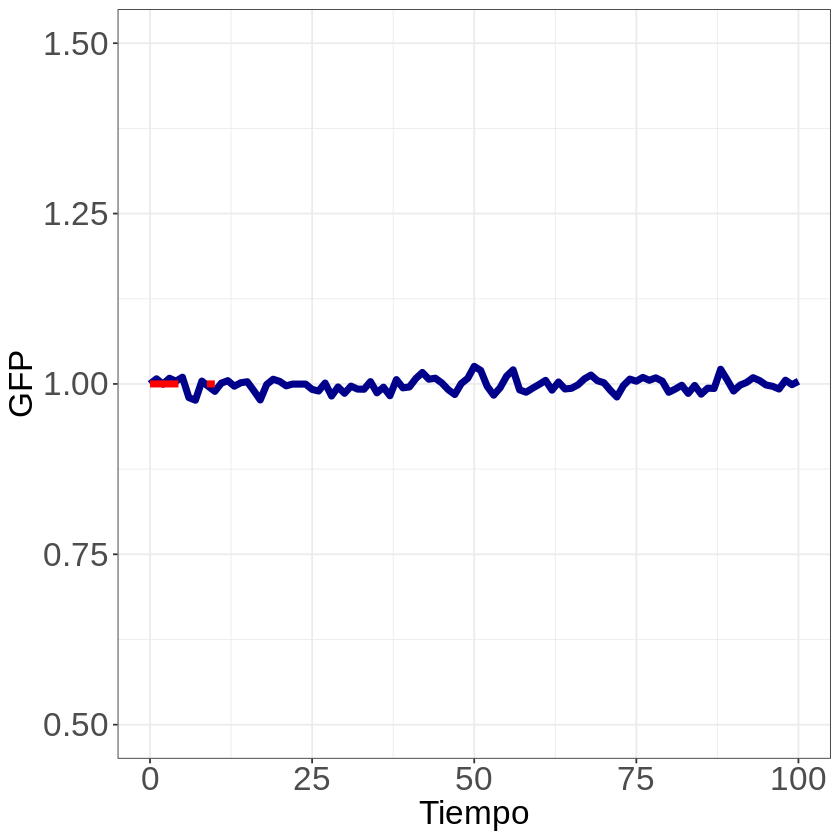

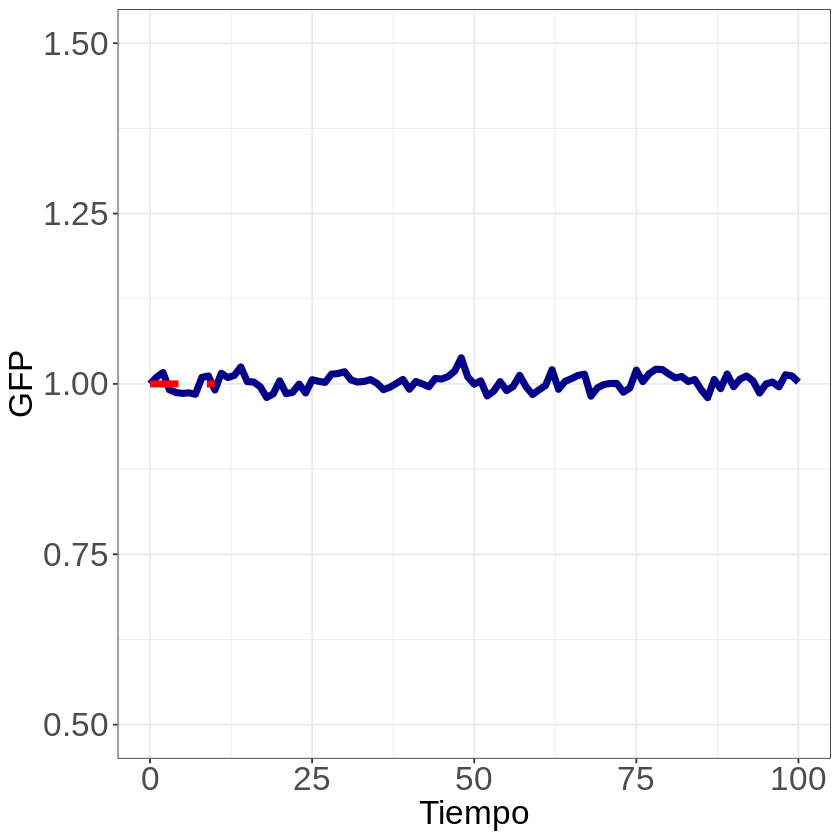

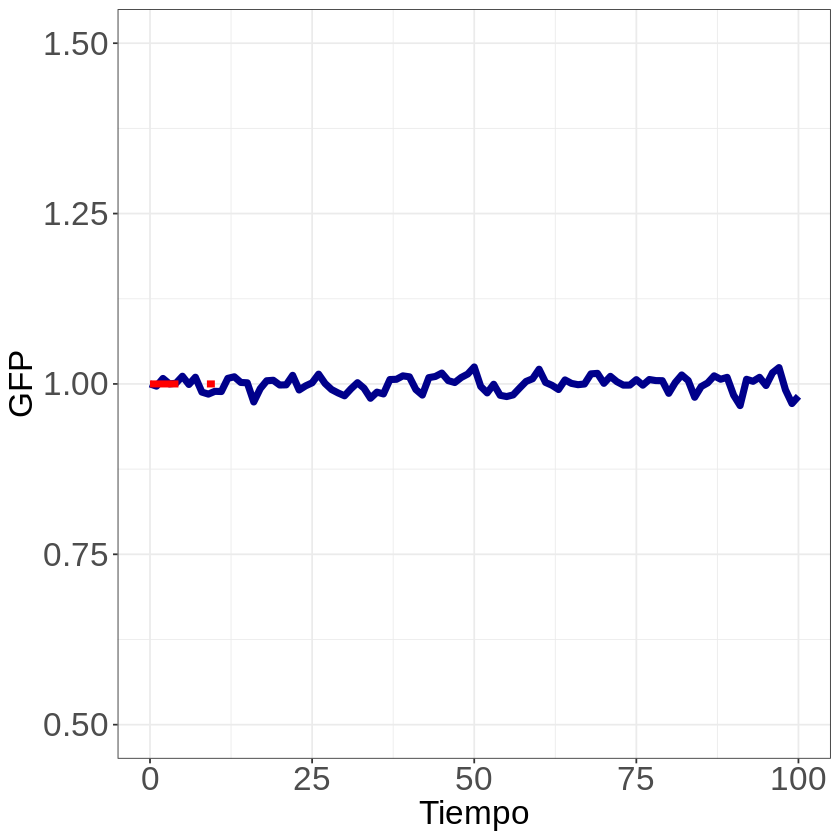

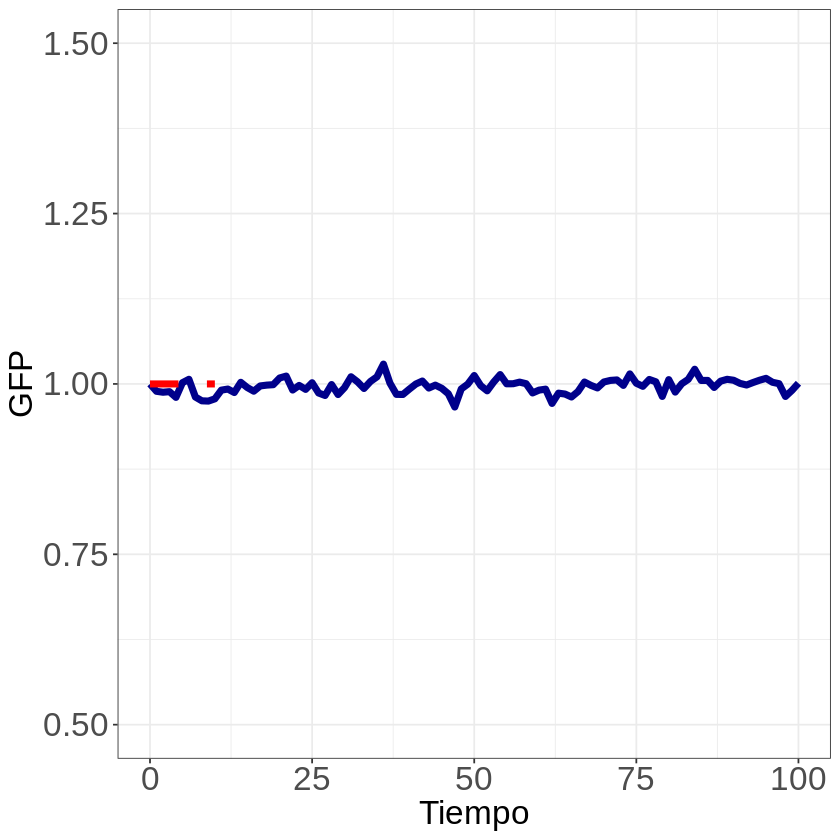

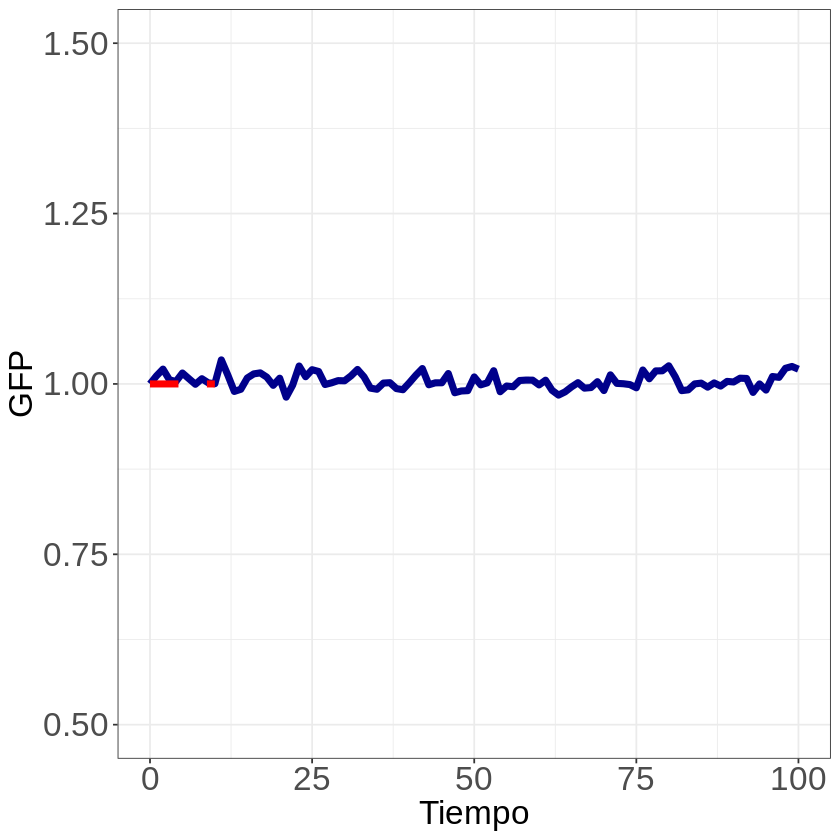

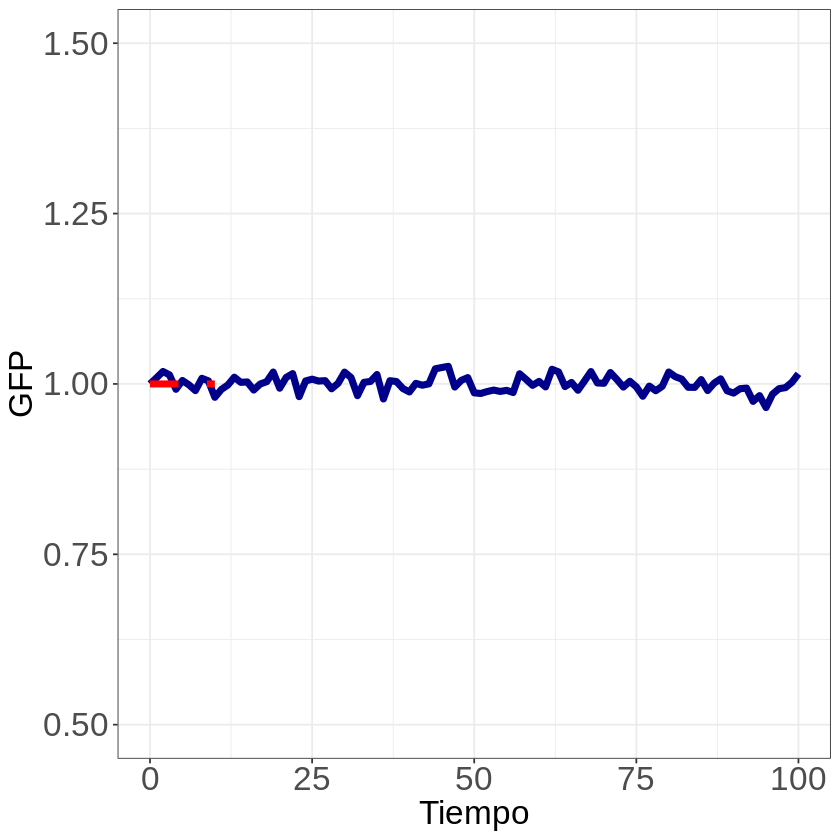

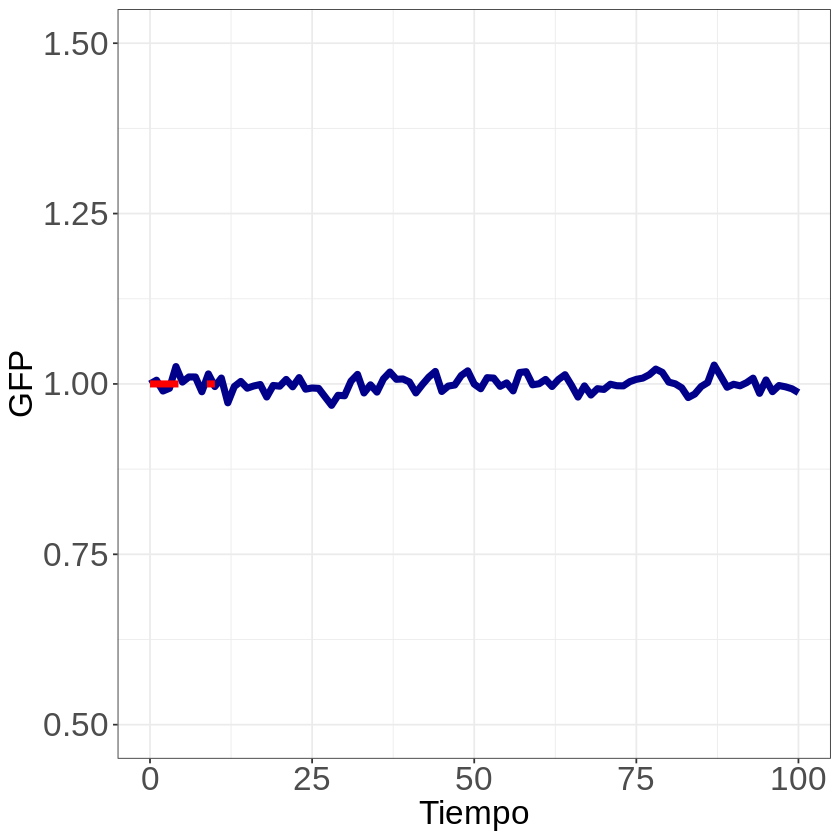

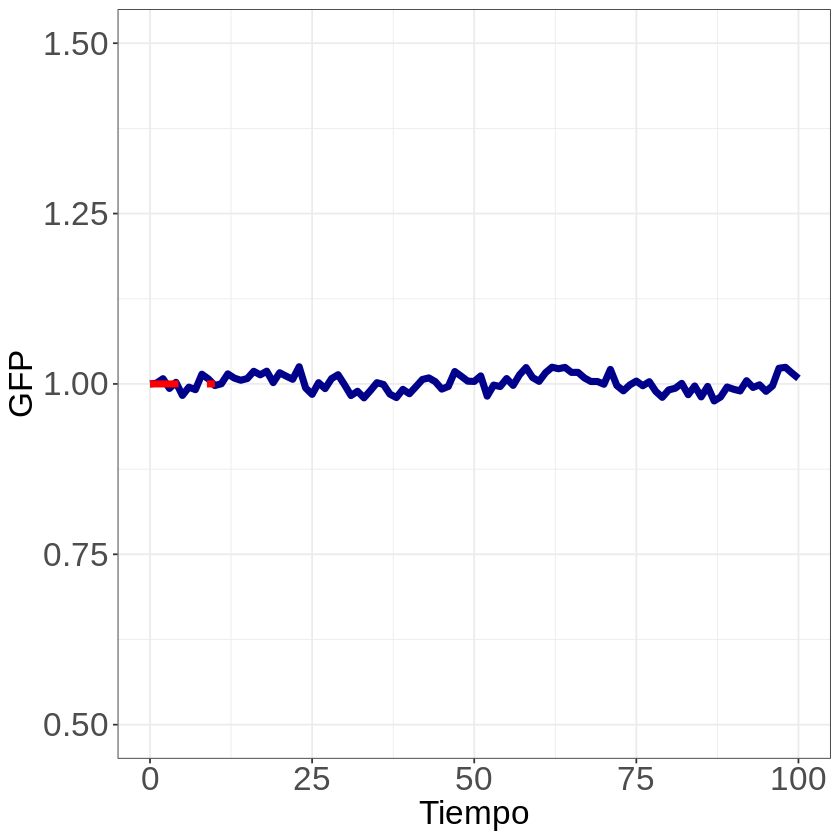

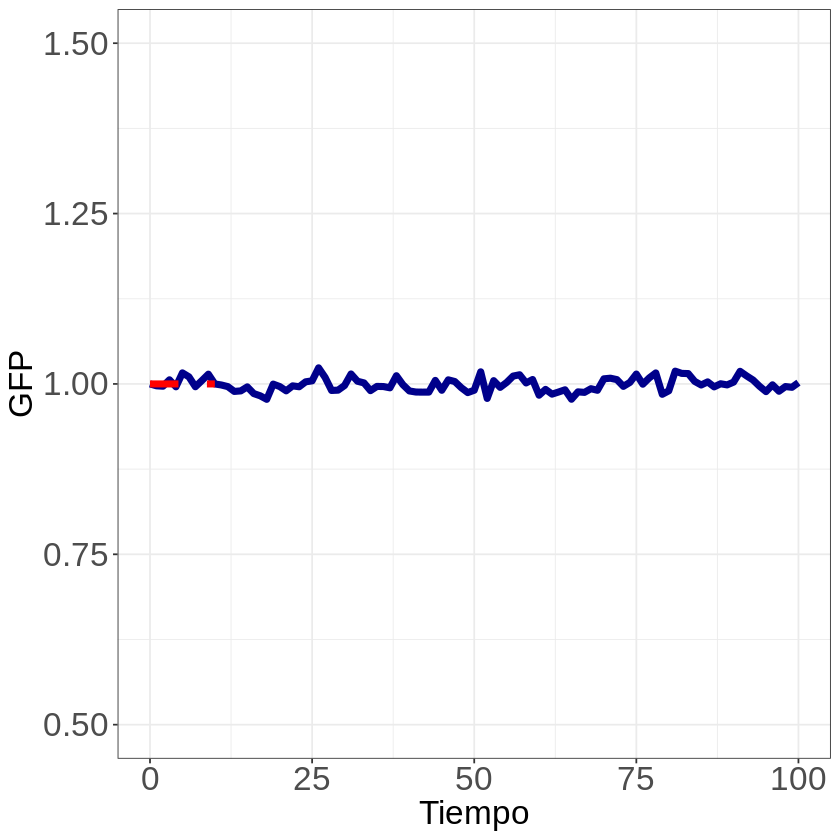

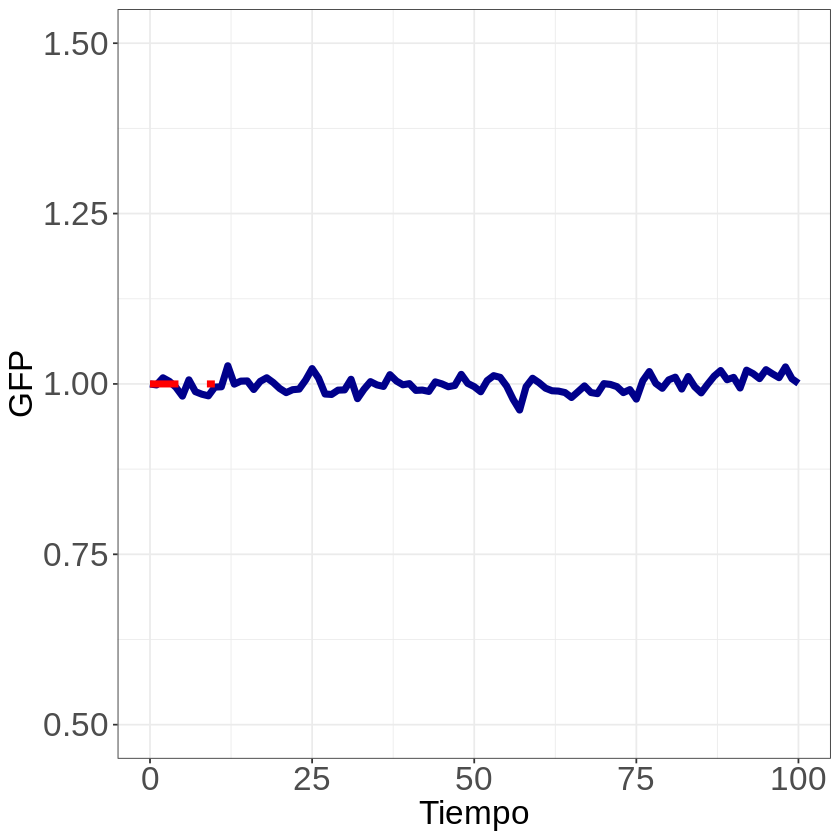

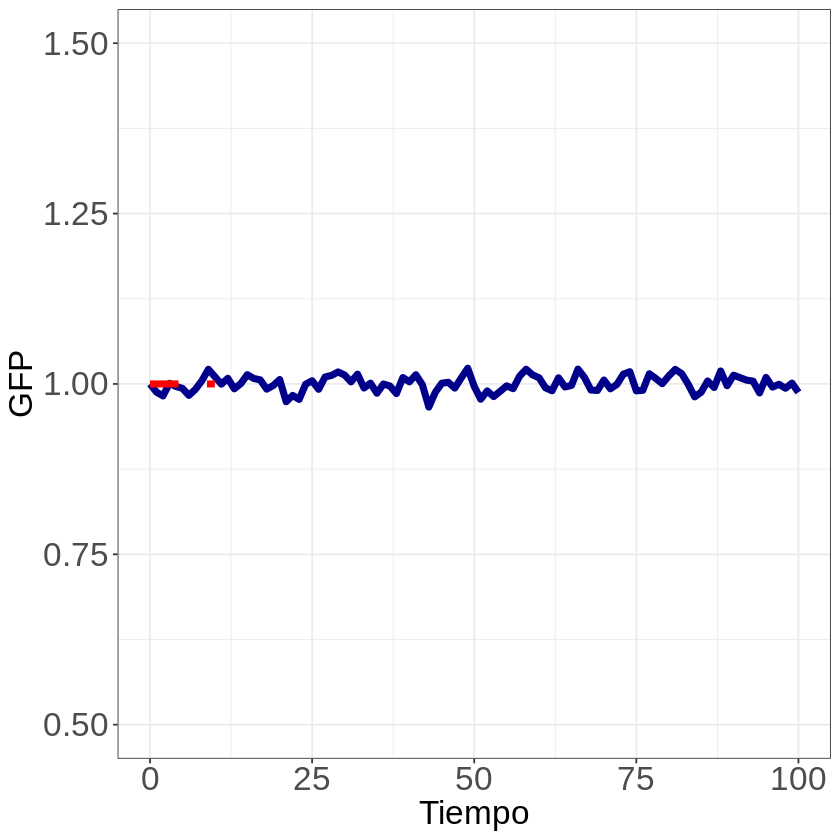

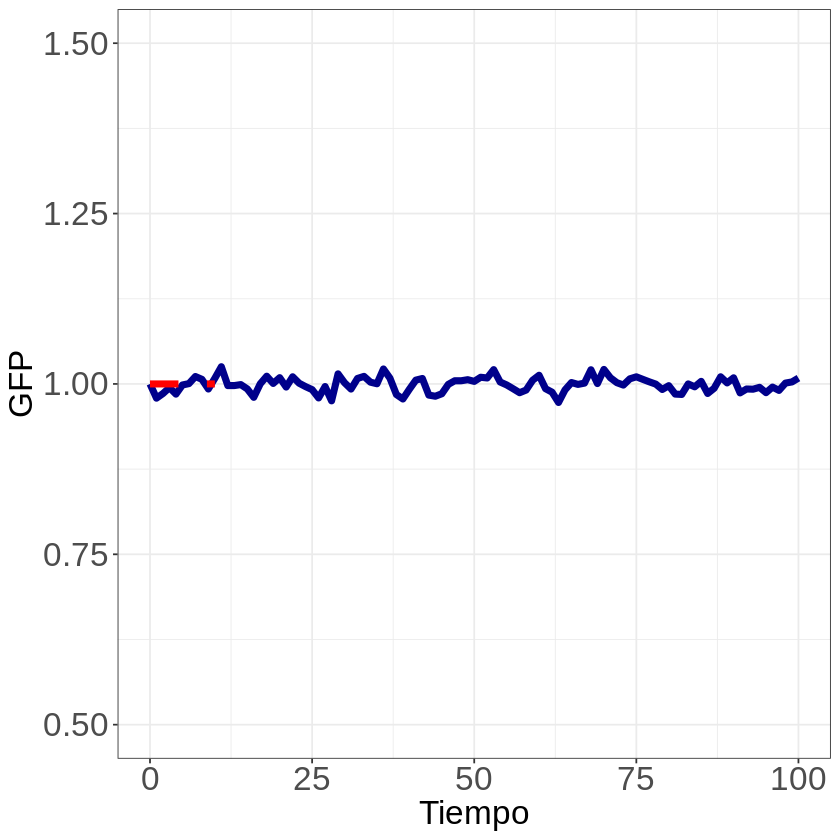

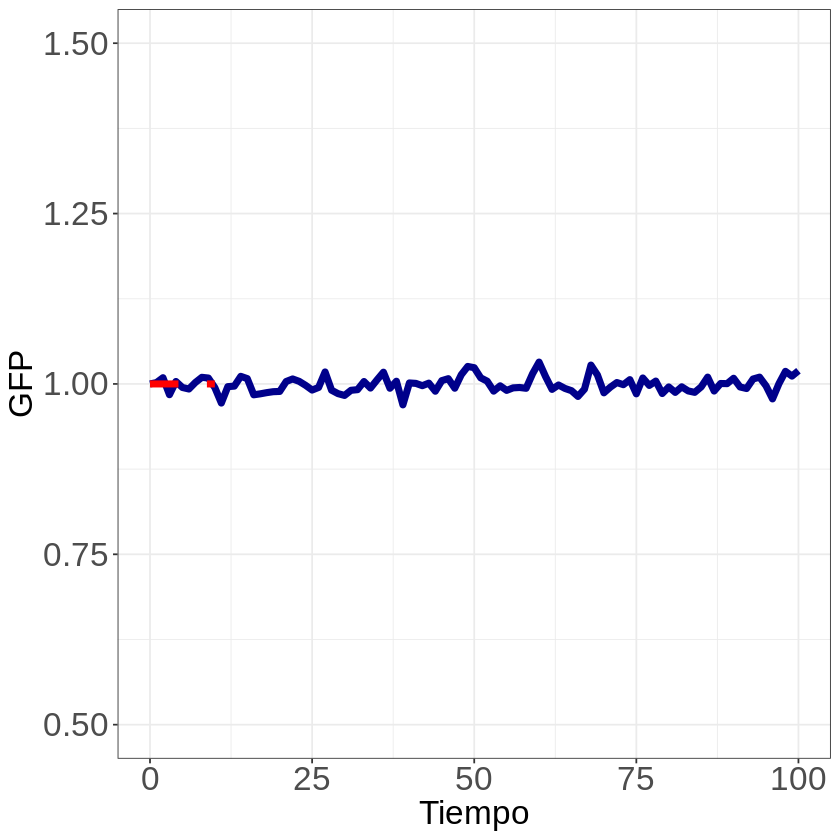

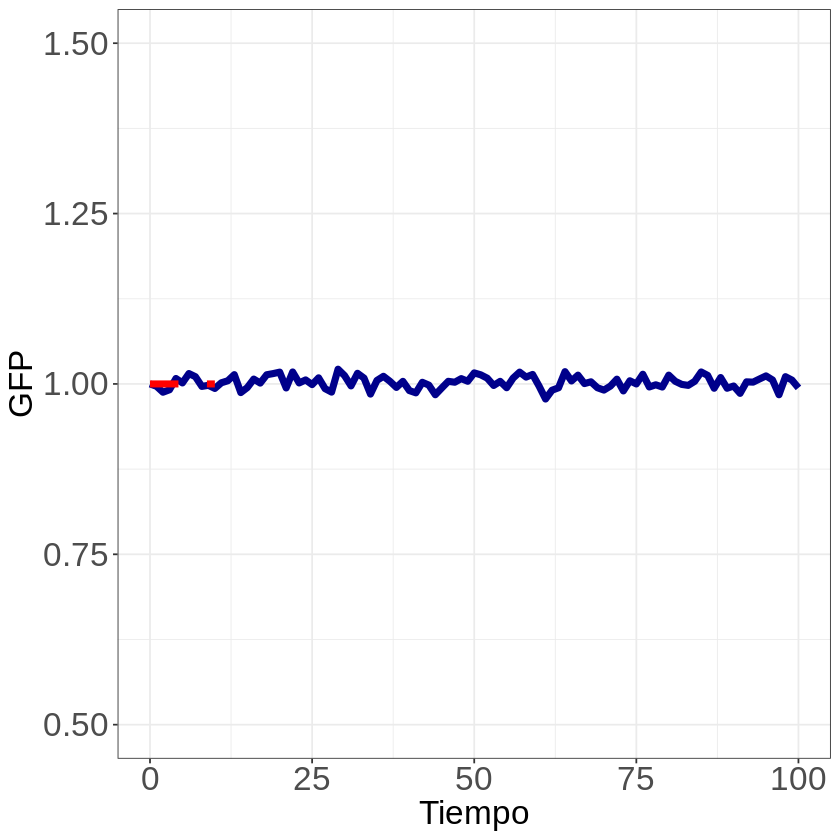

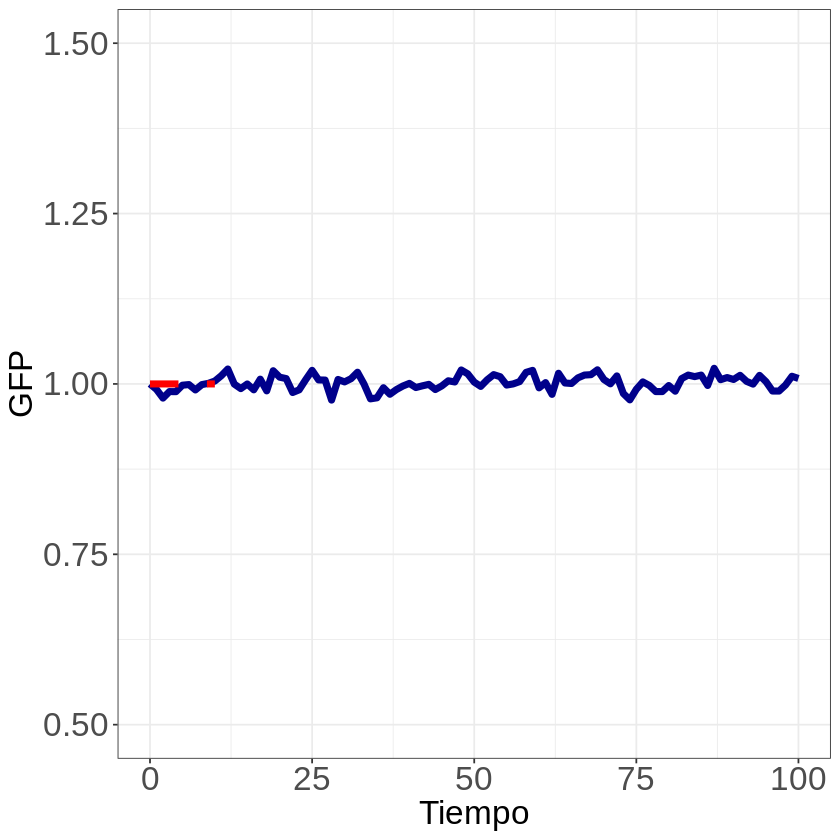

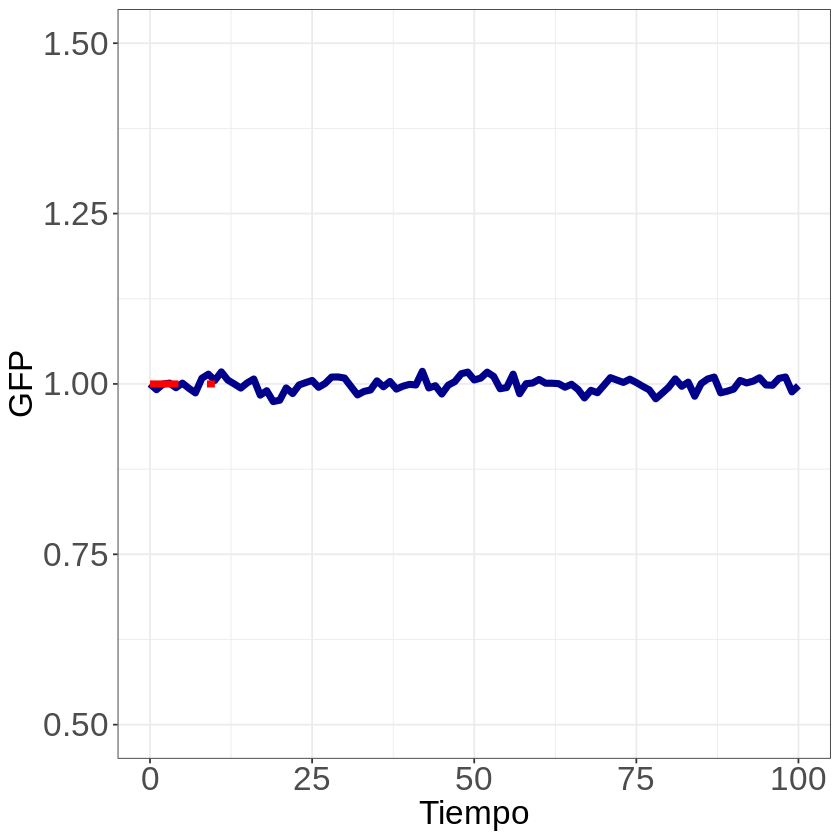

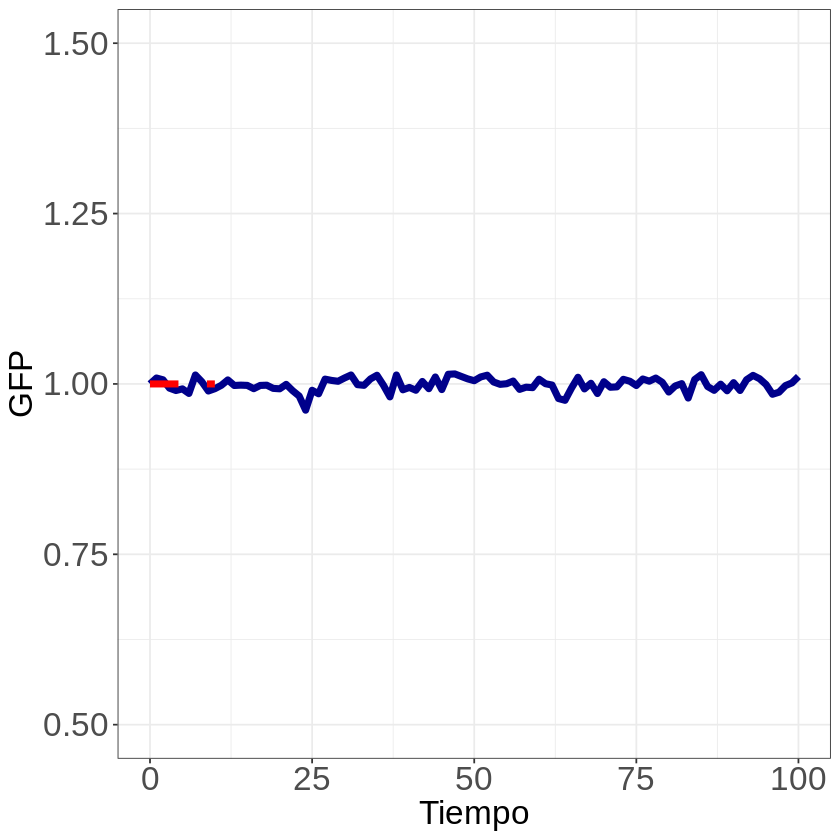

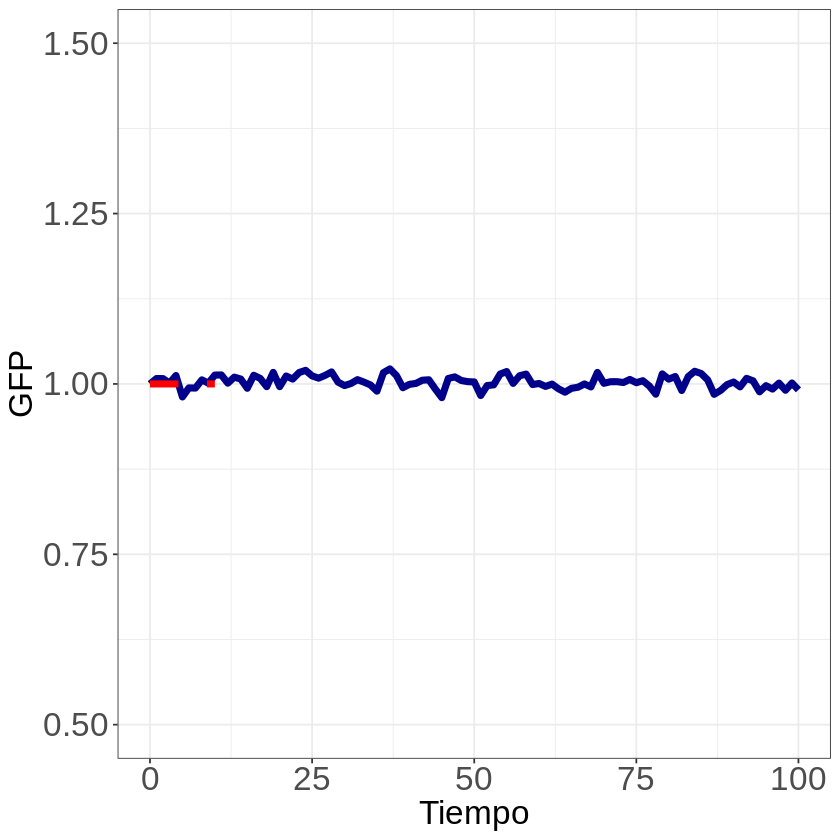

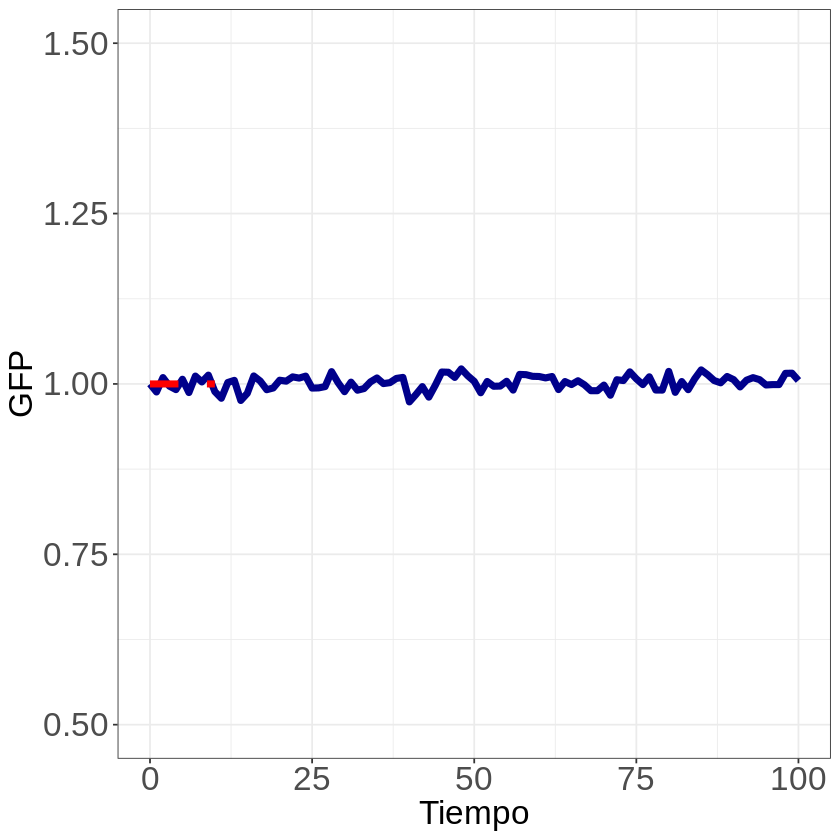

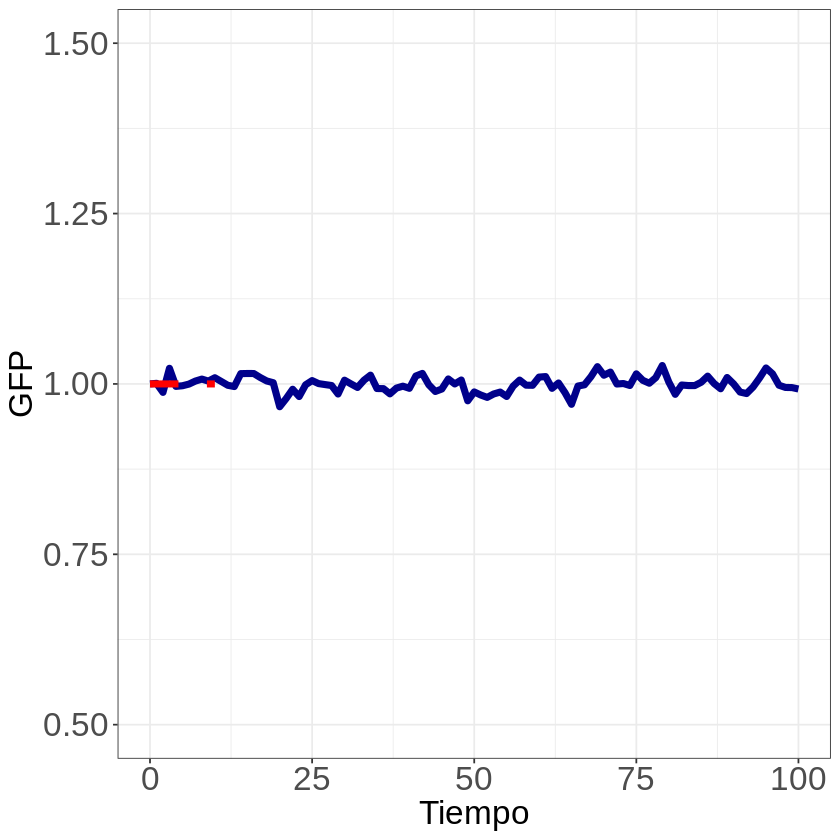

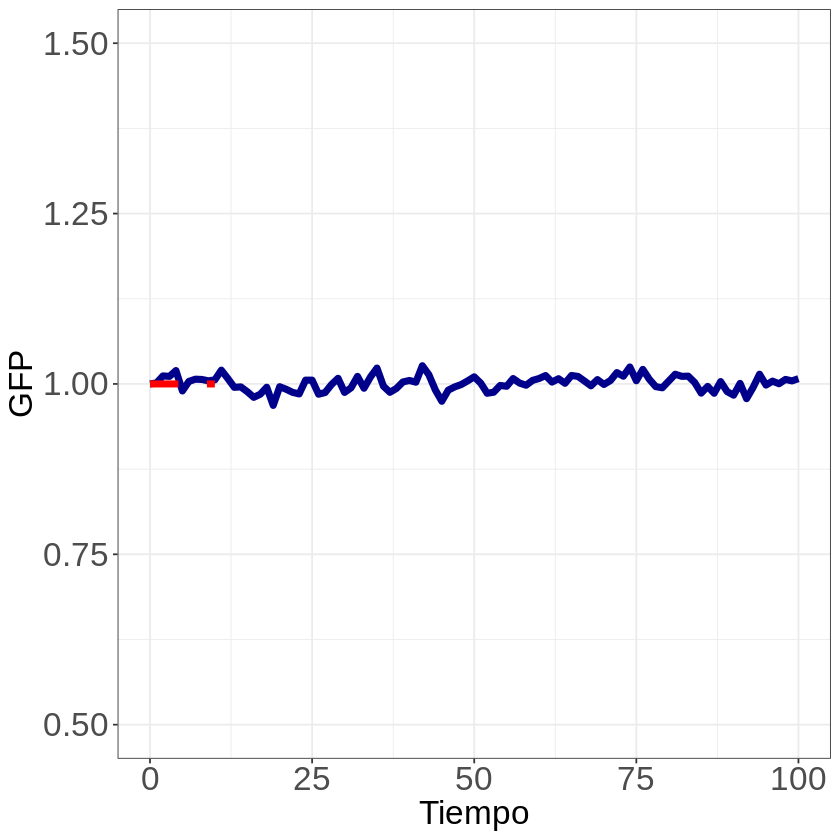

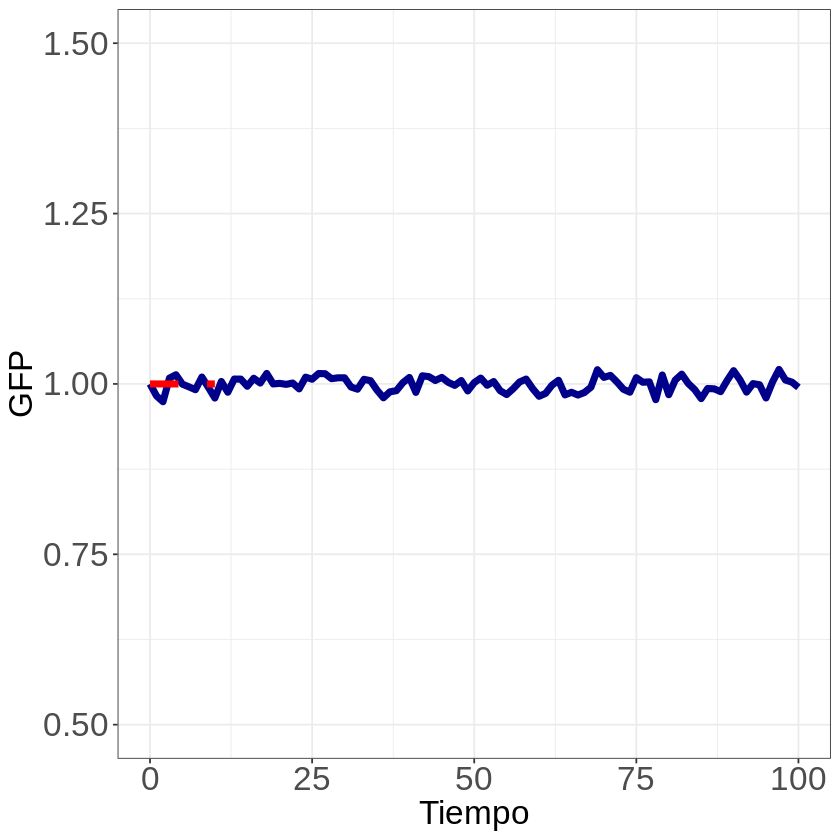

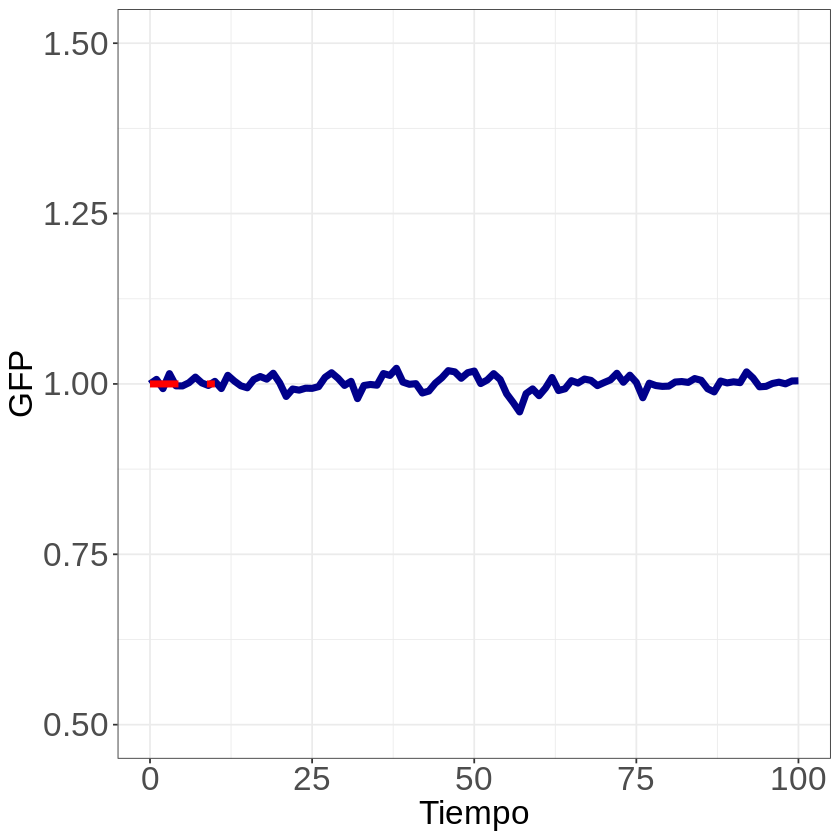

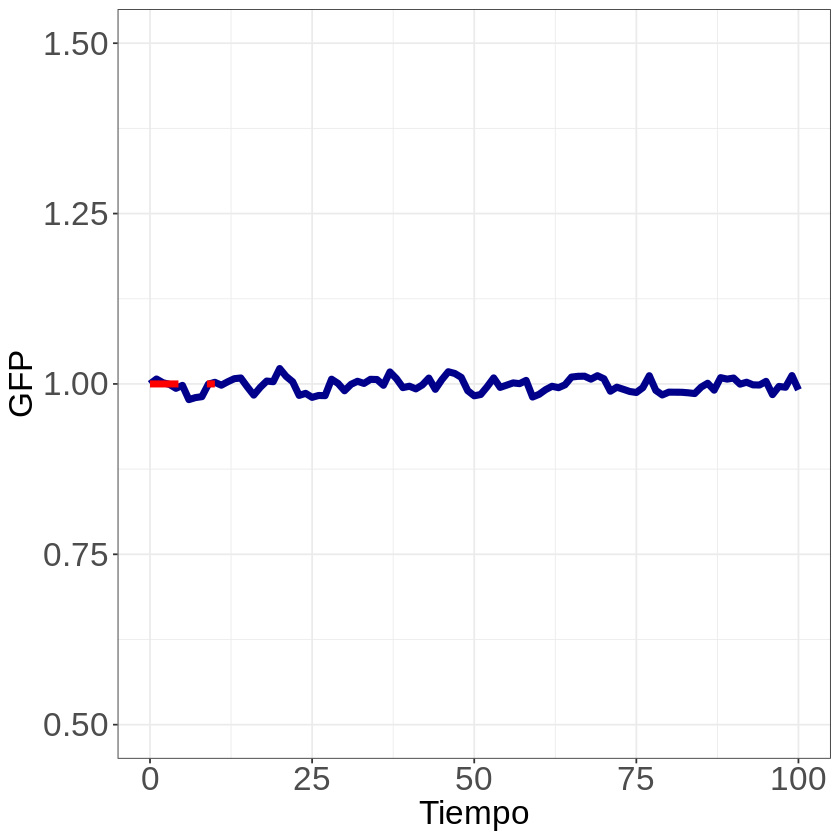

In [64]:
for (i in 1:nrow(GFP_end)) {
    # simular utilizando el método de Euler-Maruyama
    out <- run(state = s,after = "state<-state+rnorm(1,mean=0,sd=0.01)", timeplot = F, table = T)
    # mostrar fase estacionaria 
    print(
        ggplot(out, aes(x = time, y = GFP)) + 
        geom_line(lwd = 2, col = "darkblue") +
        geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
        col = "red", lty = 2, lwd = 2) +
        xlab("Tiempo") +
        ylab("GFP") + 
        ylim(c(0.5,1.5))+
        theme_bw() + 
        theme(legend.position = "none",
        plot.title = element_text(size=25,face = "italic"),
        axis.text=element_text(size=20),
        axis.title=element_text(size=20),
        legend.title = element_text(size=20), 
        legend.text = element_text(size=20))
    )
    # guardar valor final de GFP
    GFP_end[i,] <- out[nrow(out),2]

}

In [69]:
# convertir en data frame
GFP_end <- as.data.frame(GFP_end)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



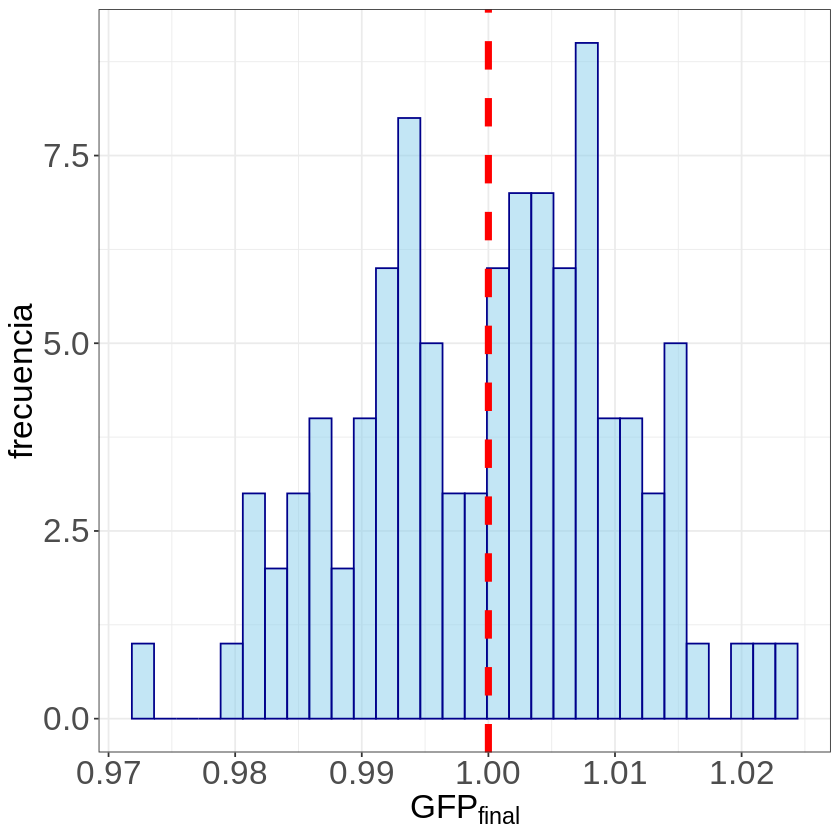

In [84]:
# mostrar distribución de valores finales de GFP
ggplot(GFP_end, aes(x = V1)) +
    geom_histogram(fill = "skyblue", col = "darkblue", alpha = 0.5) +
    geom_vline(xintercept = GFPss, col = "red", lty = 2, lwd = 2) +
    xlab(expression(GFP[final])) +
    ylab("frecuencia") + 
    theme_bw() + 
    theme(legend.position = "none",
    plot.title = element_text(size=25,face = "italic"),
    axis.text=element_text(size=20),
    axis.title=element_text(size=20),
    legend.title = element_text(size=20), 
    legend.text = element_text(size=20))


# También es posible añadir ruido a los parámetros 

In [87]:
# simular añadiendo ruido al parámetro p1 
out <- run(after="parms[\"p1\"]<-rnorm(1,1,0.1)", legend=FALSE, timeplot = F, table = T)

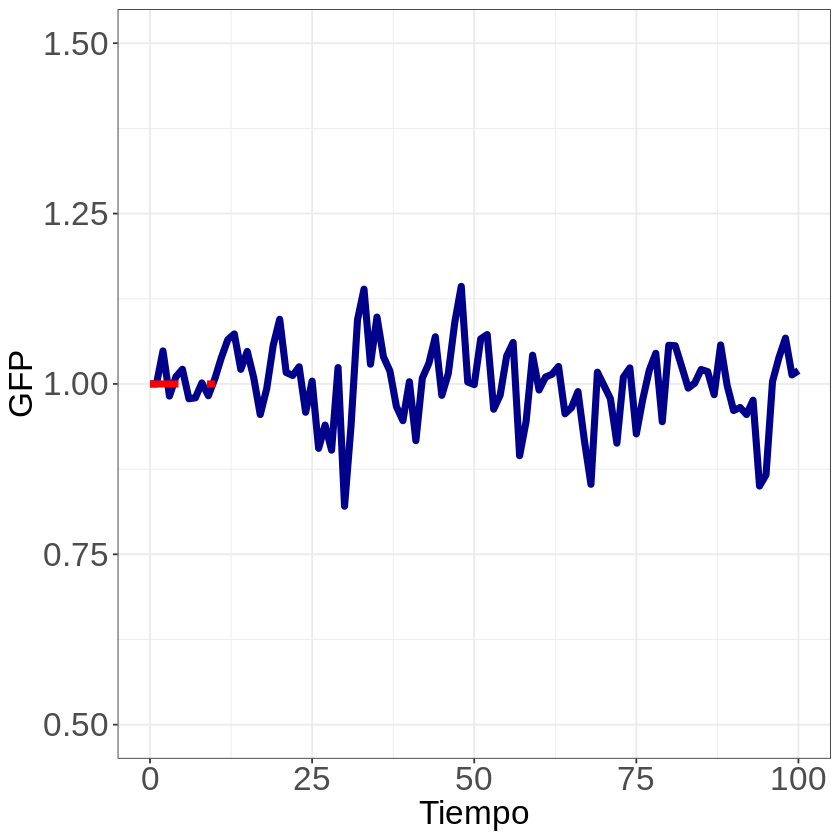

In [88]:
# mostrar fase estacionaria 
ggplot(out, aes(x = time, y = GFP)) + 
     geom_line(lwd = 2, col = "darkblue") +
     geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
     col = "red", lty = 2, lwd = 2) +
     xlab("Tiempo") +
     ylab("GFP") + 
     ylim(c(0.5,1.5))+
     theme_bw() + 
     theme(legend.position = "none",
     plot.title = element_text(size=25,face = "italic"),
     axis.text=element_text(size=20),
     axis.title=element_text(size=20),
     legend.title = element_text(size=20), 
     legend.text = element_text(size=20))

In [90]:
# simular añadiendo ruido al parámetro k2 
out <- run(after="parms[\"k2\"]<-rnorm(1,1,0.1)", legend=FALSE, timeplot = F, table = T)

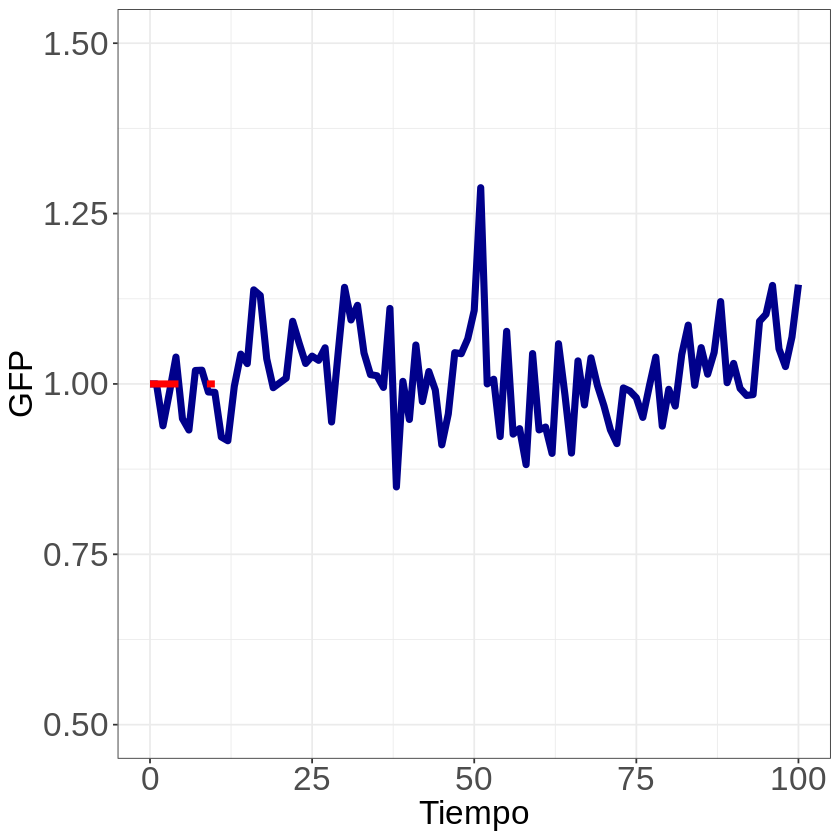

In [91]:
# mostrar fase estacionaria 
ggplot(out, aes(x = time, y = GFP)) + 
     geom_line(lwd = 2, col = "darkblue") +
     geom_line(data = data.frame(time = times, GFP = rep(GFPss, length(times))), 
     col = "red", lty = 2, lwd = 2) +
     xlab("Tiempo") +
     ylab("GFP") + 
     ylim(c(0.5,1.5))+
     theme_bw() + 
     theme(legend.position = "none",
     plot.title = element_text(size=25,face = "italic"),
     axis.text=element_text(size=20),
     axis.title=element_text(size=20),
     legend.title = element_text(size=20), 
     legend.text = element_text(size=20))